In [32]:
%matplotlib notebook
import os
import sys
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import fiona as f
import scipy

import geopandas as gp
import mplleaflet
from shapely.geometry import box as shape_box
# from shapely.geometry import Polygon
# import dbf2df as dbf
import gdal
gdal.UseExceptions()
import ogr
import osr
# import pickle
import pandas as pd
# from model_specs import *
# pth = 'MFGrid/mfgrid'
# sys.path.append(pth)
# import grid
from IPython.display import Image
from IPython.display import Math

from __future__ import print_function
import statsmodels.api as sm

from sklearn import linear_model

pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import statsmodels

from mpl_toolkits.mplot3d import Axes3D

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

height has been deprecated.



In [33]:
#Import tree data
trees_052013_file = 'U:/MST/Vienna/GIS/Trees_summarized_052013.shp'
trees_052013 = gp.read_file(trees_052013_file)

trees_082013_file = 'U:/MST/Vienna/GIS/Trees_summarized_082013.shp'
trees_082013 = gp.read_file(trees_082013_file)

trees_082014_file = 'U:/MST/Vienna/GIS/Trees_summarized_082014.shp'
trees_082014 = gp.read_file(trees_082014_file)

trees_052015_file = 'U:/MST/Vienna/GIS/Trees_summarized_052015.shp'
trees_052015 = gp.read_file(trees_052015_file)

trees_112015_file = 'U:/MST/Vienna/GIS/Trees_summarized_112015.shp'
trees_112015 = gp.read_file(trees_112015_file)

all_trees_file='U:/MST/Vienna/GIS/All_trees_summarized.shp'
all_trees = gp.read_file(all_trees_file)

In [34]:
#Import soil data
soil_file = 'U:/MST/Vienna/GIS/All_samples_StatePlane.shp'
soil = gp.read_file(soil_file)

In [35]:
#Import groundwater data

#3/2016
gw_032016_file = 'U:/MST/Vienna/GIS/GW_samples_032016.shp'
gw_032016 = gp.read_file(gw_032016_file)
#4/2015
gw_042015_file = 'U:/MST/Vienna/GIS/GW_samples_042015.shp'
gw_042015 = gp.read_file(gw_042015_file)
#9/2014
gw_092014_file = 'U:/MST/Vienna/GIS/GW_samples_092014.shp'
gw_092014 = gp.read_file(gw_092014_file)
#8/2013
gw_082013_file = 'U:/MST/Vienna/GIS/GW_samples_082013.shp'
gw_082013 = gp.read_file(gw_082013_file)
#5/2013
gw_052013_file = 'U:/MST/Vienna/GIS/GW_samples_052013.shp'
gw_052013 = gp.read_file(gw_052013_file)

#Reproject shapefiles to ft-based system
gw_082013_ft1 = gw_082013.to_crs(soil.crs)
gw_032016_ft1 = gw_032016.to_crs(soil.crs)
gw_042015_ft1 = gw_042015.to_crs(soil.crs)
gw_092014_ft1 = gw_092014.to_crs(soil.crs)
gw_052013_ft1 = gw_052013.to_crs(soil.crs)

gw_082013_ft = gw_082013.to_crs(soil.crs)
gw_032016_ft = gw_032016.to_crs(soil.crs)
gw_042015_ft = gw_042015.to_crs(soil.crs)
gw_092014_ft = gw_092014.to_crs(soil.crs)
gw_052013_ft = gw_052013.to_crs(soil.crs)


trees_052013_ft = trees_052013.to_crs(soil.crs)
trees_082013_ft = trees_082013.to_crs(soil.crs)
trees_082014_ft = trees_082014.to_crs(soil.crs)
trees_052015_ft = trees_052015.to_crs(soil.crs)
trees_112015_ft = trees_112015.to_crs(soil.crs)

all_trees_ft = all_trees.to_crs(soil.crs)

In [36]:
trees_082013_ft['DiaBin']=0
trees_052013_ft['DiaBin']=0
trees_082014_ft['DiaBin']=0
trees_052015_ft['DiaBin']=0
trees_112015_ft['DiaBin']=0

### Binning Diameter

In [37]:
tree_list=[trees_052013_ft,trees_082013_ft,trees_082014_ft,trees_052015_ft,trees_112015_ft]


for i in range(0,len(trees_052013_ft)):
    if trees_052013_ft.Average_Tr.iloc[i]<6:
        trees_052013_ft['DiaBin'].iloc[i]=0
    elif trees_052013_ft.Average_Tr.iloc[i]<20:
        trees_052013_ft['DiaBin'].iloc[i]=1
    elif trees_052013_ft.Average_Tr.iloc[i]>=20:
        trees_052013_ft['DiaBin'].iloc[i]=2
        
for i in range(0,len(trees_082013_ft)):
    if trees_082013_ft.Average_Tr.iloc[i]<6:
        trees_082013_ft['DiaBin'].iloc[i]=0
    elif trees_082013_ft.Average_Tr.iloc[i]<20:
        trees_082013_ft['DiaBin'].iloc[i]=1
    elif trees_082013_ft.Average_Tr.iloc[i]>=20:
        trees_082013_ft['DiaBin'].iloc[i]=2
        
for i in range(0,len(trees_082014_ft)):
    if trees_082014_ft.Average_Tr.iloc[i]<6:
        trees_082014_ft['DiaBin'].iloc[i]=0
    elif trees_082014_ft.Average_Tr.iloc[i]<20:
        trees_082014_ft['DiaBin'].iloc[i]=1
    elif trees_082014_ft.Average_Tr.iloc[i]>=20:
        trees_082014_ft['DiaBin'].iloc[i]=2
        
for i in range(0,len(trees_052015_ft)):
    if trees_052015_ft.Average_Tr.iloc[i]<6:
        trees_052015_ft['DiaBin'].iloc[i]=0
    elif trees_052015_ft.Average_Tr.iloc[i]<20:
        trees_052015_ft['DiaBin'].iloc[i]=1
    elif trees_052015_ft.Average_Tr.iloc[i]>=20:
        trees_052015_ft['DiaBin'].iloc[i]=2
        
for i in range(0,len(trees_112015_ft)):
    if trees_112015_ft.Average_Tr.iloc[i]<6:
        trees_112015_ft['DiaBin'].iloc[i]=0
    elif trees_112015_ft.Average_Tr.iloc[i]<20:
        trees_112015_ft['DiaBin'].iloc[i]=1
    elif trees_112015_ft.Average_Tr.iloc[i]>=20:
        trees_112015_ft['DiaBin'].iloc[i]=2

In [38]:
trees_052013_ft

,Average_CF,Average_PC,Average_TC,Average_Tr,Gen_Specie,IDENT,Last_SAMPL,Last_Speci,Maximum_X_,Maximum_Y_,Root_rad,geometry,DiaBin
0,0.0000,325.0924,77.0000,26.0000,None,TC065,2013-05-03,Oak,-91.942018,38.190555,19.811999,POINT (1800779.768145582 858690.0552430786),2
1,0.0000,7.5704,7.7000,36.0000,None,TC066,2013-05-03,Oak,-91.942342,38.189793,27.431999,POINT (1800688.320235709 858412.0104393439),2
2,0.0000,0.4700,7.7000,21.0000,None,TC067,2013-05-03,Oak,-91.942153,38.189882,16.001999,POINT (1800742.444396533 858444.7469544215),2
3,67.0243,4.7000,7.7000,21.0000,None,TC068,2013-05-03,Cedar,-91.941970,38.189789,16.001999,POINT (1800795.243108081 858411.1974290157),2
4,0.0000,0.4700,7.7000,11.0000,None,TC069,2013-05-03,Oak,-91.941952,38.189629,8.382000,POINT (1800800.767238212 858352.9641719672),1
5,17.8952,4.7000,7.7000,8.0000,None,TC070,2013-05-03,Cedar,-91.941878,38.189551,6.096000,POINT (1800822.20621473 858324.6883557285),1
6,0.0000,0.4700,7.7000,4.0000,None,TC071,2013-05-03,Oak,-91.941631,38.189626,3.048000,POINT (1800893.030551597 858352.4274408823),0
7,0.0000,4.7000,7.7000,32.0000,None,TC072,2013-05-03,Oak,-91.941377,38.189715,24.383999,POINT (1800965.835837883 858385.2769797205),2
8,0.0000,0.4700,7.7000,17.5000,None,TC073,2013-05-03,Oak,-91.941243,38.189711,13.335000,POINT (1801004.356731726 858384.0525552863),1
9,0.0000,0.4700,7.7000,8.5000,None,TC074,2013-05-03,Ash,-91.941493,38.189305,6.477000,POINT (1800933.396827576 858235.773479959),1


## Single SLR

In [39]:
# buffer=160
# gw_082013_buffer=gw_082013_ft1.buffer(buffer)
# gw_032016_buffer=gw_032016_ft1.buffer(buffer)
# gw_042015_buffer=gw_042015_ft1.buffer(buffer)
# gw_092014_buffer=gw_092014_ft1.buffer(buffer)
# gw_052013_buffer=gw_052013_ft1.buffer(buffer)

# gw_082013_ft.geometry = gw_082013_buffer
# gw_032016_ft.geometry = gw_032016_buffer
# gw_042015_ft.geometry = gw_042015_buffer
# gw_092014_ft.geometry = gw_092014_buffer
# gw_052013_ft.geometry = gw_052013_buffer

# #Execute a spatial join with wells to trees 
# trees_gw_052013 = gp.sjoin(gw_052013_ft,trees_052013_ft, how='inner',op='intersects')
# trees_gw_082013 = gp.sjoin(gw_082013_ft,trees_082013_ft, how='inner',op='intersects')
# trees_gw_082014 = gp.sjoin(gw_092014_ft,trees_082014_ft, how='inner',op='intersects')
# trees_gw_052015 = gp.sjoin(gw_042015_ft,trees_052015_ft, how='inner',op='intersects')
# trees_gw_112015 = gp.sjoin(gw_032016_ft,trees_112015_ft, how='inner',op='intersects')

# # trees_gw_pce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
# # # trees_gw_pce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_112015])
# # trees_gw_pce.loc[trees_gw_pce['Average_PC']<=0.47,'Average_PC']=0.47
# # # trees_gw_pce.loc[trees_gw_pce['Average_Tr']>16,'Average_PC']=np.nan
# # # trees_gw_pce.loc[trees_gw_pce['TETRACHL_1']=='U','TETRACHLOR']  = 1
# # trees_gw_pce['gw_log_pce'] = np.log(trees_gw_pce['TETRACHLOR'])
# # trees_gw_pce['tree_log_pce'] = np.log(trees_gw_pce['Average_PC'])

# trees_gw_tce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
# trees_gw_tce.loc[trees_gw_tce['Average_TC']<=7.7,'Average_TC']=7.7
# # trees_gw_tce.loc[trees_gw_tce['TRICHLOR_1']=='U','TRICHLOROE']  = 1
# trees_gw_tce.loc[trees_gw_tce['TRICHLOROE']==0,'TRICHLOROE']  = np.nan
# trees_gw_tce['gw_log_tce'] = np.log(trees_gw_tce['TRICHLOROE'])
# trees_gw_tce['tree_log_tce'] = np.log(trees_gw_tce['Average_TC'])

# # trees_gw_cfc=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
# # trees_gw_cfc.loc[trees_gw_cfc['Average_CF']==0,'Average_CF']=np.nan
# # trees_gw_cfc.loc[trees_gw_cfc['a112_Tri_1']=='U','a112_Trich']  = 1
# # trees_gw_cfc['gw_log_cfc'] = np.log(trees_gw_cfc['a112_Trich'])
# # trees_gw_cfc['tree_log_cfc'] = np.log(trees_gw_cfc['Average_CF'])

# # X1 = sm.add_constant(trees_gw_cfc.tree_log_cfc)
# # model_cfc = sm.OLS(trees_gw_cfc.gw_log_cfc,X1, missing='drop')
# # results_cfc = model_cfc.fit()

# # rho_cfc = scipy.stats.spearmanr(trees_gw_cfc.gw_log_cfc, trees_gw_cfc.tree_log_cfc)


# X2 = sm.add_constant(trees_gw_tce.tree_log_tce)
# model_tce = sm.OLS(trees_gw_tce.gw_log_tce,X2, missing='drop')
# results_tce = model_tce.fit()

# print(results_tce.summary())

# # rho_tce = scipy.stats.spearmanr(trees_gw_tce.gw_log_tce, trees_gw_tce.tree_log_tce)

# # X3 = sm.add_constant(trees_gw_pce.gw_log_pce)
# # model_pce = sm.OLS(trees_gw_pce.tree_log_pce,X3, missing='drop')
# # results_pce = model_pce.fit()

# # print(results_pce.summary())

# statsmodels.graphics.regressionplots.plot_regress_exog(results_tce,1)

# # fig = plt.figure()
# # ax = fig.add_subplot(111, projection='3d')
# # ax.scatter(trees_gw_pce.gw_log_pce,trees_gw_pce.tree_log_pce,trees_gw_pce.Average_Tr )

# # rho_pce = scipy.stats.spearmanr(trees_gw_pce.gw_log_pce, trees_gw_pce.tree_log_pce)


## Single MLR with Tree and Diameter

In [40]:
# buffer=60
# gw_082013_buffer=gw_082013_ft1.buffer(buffer)
# gw_032016_buffer=gw_032016_ft1.buffer(buffer)
# gw_042015_buffer=gw_042015_ft1.buffer(buffer)
# gw_092014_buffer=gw_092014_ft1.buffer(buffer)
# gw_052013_buffer=gw_052013_ft1.buffer(buffer)

# gw_082013_ft.geometry = gw_082013_buffer
# gw_032016_ft.geometry = gw_032016_buffer
# gw_042015_ft.geometry = gw_042015_buffer
# gw_092014_ft.geometry = gw_092014_buffer
# gw_052013_ft.geometry = gw_052013_buffer

# #Execute a spatial join with wells to trees 
# trees_gw_052013 = gp.sjoin(gw_052013_ft,trees_052013_ft, how='inner',op='intersects')
# trees_gw_082013 = gp.sjoin(gw_082013_ft,trees_082013_ft, how='inner',op='intersects')
# trees_gw_082014 = gp.sjoin(gw_092014_ft,trees_082014_ft, how='inner',op='intersects')
# trees_gw_052015 = gp.sjoin(gw_042015_ft,trees_052015_ft, how='inner',op='intersects')
# trees_gw_112015 = gp.sjoin(gw_032016_ft,trees_112015_ft, how='inner',op='intersects')

# trees_gw_pce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
# # trees_gw_pce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_112015])
# trees_gw_pce.loc[trees_gw_pce['Average_PC']<=0.47,'Average_PC']=0.47
# # trees_gw_pce.loc[trees_gw_pce['TETRACHL_1']=='U','TETRACHLOR']  = 1
# trees_gw_pce['gw_log_pce'] = np.log(trees_gw_pce['TETRACHLOR'])
# trees_gw_pce['tree_log_pce'] = np.log(trees_gw_pce['Average_PC'])

# trees_gw_tce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
# trees_gw_tce.loc[trees_gw_tce['Average_TC']<=7.7,'Average_TC']=np.nan
# # trees_gw_tce.loc[trees_gw_tce['TRICHLOR_1']=='U','TRICHLOROE']  = 1
# trees_gw_tce.loc[trees_gw_tce['TRICHLOROE']==0,'TRICHLOROE']  = np.nan
# trees_gw_tce['gw_log_tce'] = np.log(trees_gw_tce['TRICHLOROE'])
# trees_gw_tce['tree_log_tce'] = np.log(trees_gw_tce['Average_TC'])

# # trees_gw_cfc=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
# # trees_gw_cfc.loc[trees_gw_cfc['Average_CF']==0,'Average_CF']=np.nan
# # trees_gw_cfc.loc[trees_gw_cfc['a112_Tri_1']=='U','a112_Trich']  = 1
# # trees_gw_cfc['gw_log_cfc'] = np.log(trees_gw_cfc['a112_Trich'])
# # trees_gw_cfc['tree_log_cfc'] = np.log(trees_gw_cfc['Average_CF'])

# # X1 = sm.add_constant(trees_gw_cfc.tree_log_cfc)
# # model_cfc = sm.OLS(trees_gw_cfc.gw_log_cfc,X1, missing='drop')
# # results_cfc = model_cfc.fit()

# # rho_cfc = scipy.stats.spearmanr(trees_gw_cfc.gw_log_cfc, trees_gw_cfc.tree_log_cfc)

# # X = trees_gw_tce[['tree_log_tce','Average_Tr']]
# # X2 = sm.add_constant(X)
# # model_tce = sm.OLS(trees_gw_tce.gw_log_tce,X2, missing='drop')
# # results_tce = model_tce.fit()

# # print(results_tce.summary())

# # fig =plt.figure(dpi=200)

# # statsmodels.graphics.regressionplots.plot_regress_exog(results_tce,1, fig=fig)

# # plt.savefig("GW_PCE_MLR_Reg.pdf")


# # rho_tce = scipy.stats.spearmanr(trees_gw_tce.gw_log_tce, trees_gw_tce.tree_log_tce)

# # X = trees_gw_pce[['tree_log_pce','Average_Tr']]
# # X3 = sm.add_constant(X)
# # model_pce = sm.OLS(trees_gw_pce.gw_log_pce,X3, missing='drop')
# # results_pce = model_pce.fit()

# # print(results_pce.summary())

# # statsmodels.graphics.regressionplots.plot_regress_exog(results_pce,1)

# # rho_pce = scipy.stats.spearmanr(trees_gw_pce.gw_log_pce, trees_gw_pce.tree_log_pce)


## Looped SLR 

In [41]:
buffer=10
stats_SLR = pd.DataFrame(columns=['R2-PCE', 'c','p','n','rho-PCE', 'p','R2-CFC','c', 'p','n','rho-CFC','p', 'R2-TCE','c','p','n', 'rho-TCE','p'], index = range(buffer,310,10))
data=[]
j=1
for x in range(buffer,310,10):
# tree_buffer_const = 10
    gw_082013_buffer=gw_082013_ft1.buffer(x)
    gw_032016_buffer=gw_032016_ft1.buffer(x)
    gw_042015_buffer=gw_042015_ft1.buffer(x)
    gw_092014_buffer=gw_092014_ft1.buffer(x)
    gw_052013_buffer=gw_052013_ft1.buffer(x)

    gw_082013_ft.geometry = gw_082013_buffer
    gw_032016_ft.geometry = gw_032016_buffer
    gw_042015_ft.geometry = gw_042015_buffer
    gw_092014_ft.geometry = gw_092014_buffer
    gw_052013_ft.geometry = gw_052013_buffer

    #Execute a spatial join with wells to trees 
    data = []
    try:
        trees_gw_052013 = gp.sjoin(gw_052013_ft,trees_052013_ft, how='inner',op='intersects')
        data.append(trees_gw_052013)
    except:
        pass
    try:
        trees_gw_082013 = gp.sjoin(gw_082013_ft,trees_082013_ft, how='inner',op='intersects')
        data.append(trees_gw_082013)
    except:
        pass
    try:
        trees_gw_082014 = gp.sjoin(gw_092014_ft,trees_082014_ft, how='inner',op='intersects')
        data.append(trees_gw_082014)
    except:
        pass
    try:
        trees_gw_052015 = gp.sjoin(gw_042015_ft,trees_052015_ft, how='inner',op='intersects')
        data.append(trees_gw_052015)
    except:
        pass
    try:
        trees_gw_112015 = gp.sjoin(gw_032016_ft,trees_112015_ft, how='inner',op='intersects')
        data.append(trees_gw_112015)
    except:
        pass

#     trees_gw_pce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
    trees_gw_pce = pd.DataFrame()
    trees_gw_pce = trees_gw_pce.append(data)
    # trees_gw_pce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_112015])
    trees_gw_pce.loc[trees_gw_pce['Average_PC']<=0.47,'Average_PC']=0.47
    # trees_gw_pce.loc[trees_gw_pce['TETRACHL_1']=='U','TETRACHLOR']  = 1
    trees_gw_pce['gw_log_pce'] = np.log(trees_gw_pce['TETRACHLOR'])
    trees_gw_pce['tree_log_pce'] = np.log(trees_gw_pce['Average_PC'])
    
#     trees_gw_tce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
    trees_gw_tce = pd.DataFrame()
    trees_gw_tce = trees_gw_tce.append(data)
    trees_gw_tce.loc[trees_gw_tce['Average_TC']<=7.7,'Average_TC']=np.nan
    # trees_gw_tce.loc[trees_gw_tce['TRICHLOR_1']=='U','TRICHLOROE']  = 1
    trees_gw_tce.loc[trees_gw_tce['TRICHLOROE']==0,'TRICHLOROE']  = np.nan
    trees_gw_tce['gw_log_tce'] = np.log(trees_gw_tce['TRICHLOROE'])
    trees_gw_tce['tree_log_tce'] = np.log(trees_gw_tce['Average_TC'])
    
#     trees_gw_cfc=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
    trees_gw_cfc = pd.DataFrame()
    trees_gw_cfc = trees_gw_cfc.append(data)
    trees_gw_cfc.loc[trees_gw_cfc['Average_CF']==0,'Average_CF']=np.nan
#     trees_gw_cfc.loc[trees_gw_cfc['a112_Tri_1']=='U','a112_Trich']  = 1
    trees_gw_cfc['gw_log_cfc'] = np.log(trees_gw_cfc['a112_Trich'])
    trees_gw_cfc['tree_log_cfc'] = np.log(trees_gw_cfc['Average_CF'])
    
    try:
        X1 = sm.add_constant(trees_gw_cfc.tree_log_cfc)
        model_cfc = sm.OLS(trees_gw_cfc.gw_log_cfc,X1, missing='drop')
        results_cfc = model_cfc.fit()

        stats_SLR.iloc[j-1,6]=results_cfc.rsquared_adj
        stats_SLR.iloc[j-1,7]=results_cfc.pvalues.loc['const']
        stats_SLR.iloc[j-1,8]=results_cfc.pvalues.loc['tree_log_cfc']
        stats_SLR.iloc[j-1,9]=results_cfc.df_resid+2


    except:
        stats_SLR.iloc[j-1,6]=np.nan
        stats_SLR.iloc[j-1,7]=np.nan
        stats_SLR.iloc[j-1,8]=np.nan
        stats_SLR.iloc[j-1,9]=np.nan

    try:
        rho_cfc = scipy.stats.spearmanr(trees_gw_cfc.gw_log_cfc, trees_gw_cfc.tree_log_cfc,nan_policy="omit")
        stats_SLR.iloc[j-1,10]=rho_cfc.correlation
        stats_SLR.iloc[j-1,11]=rho_cfc.pvalue

    except:
        stats_SLR.iloc[j-1,10]=np.nan
        stats_SLR.iloc[j-1,11]=np.nan


    try:
        X2 = sm.add_constant(trees_gw_tce.tree_log_tce)
        model_tce = sm.OLS(trees_gw_tce.gw_log_tce,X2, missing='drop')
        results_tce = model_tce.fit()

        stats_SLR.iloc[j-1,12]=results_tce.rsquared_adj
        stats_SLR.iloc[j-1,13]=results_tce.pvalues.loc['const']
        stats_SLR.iloc[j-1,14]=results_tce.pvalues.loc['tree_log_tce']
        stats_SLR.iloc[j-1,15]=results_tce.df_resid+2

    except:
        stats_SLR.iloc[j-1,12]=np.nan
        stats_SLR.iloc[j-1,13]=np.nan
        stats_SLR.iloc[j-1,14]=np.nan
        stats_SLR.iloc[j-1,15]=np.nan


    try:
        rho_tce = scipy.stats.spearmanr(trees_gw_tce.gw_log_tce, trees_gw_tce.tree_log_tce,nan_policy="omit")
        stats_SLR.iloc[j-1,16]=rho_tce.correlation
        stats_SLR.iloc[j-1,17]=rho_tce.pvalue

    except:
        stats_SLR.iloc[j-1,16]=np.nan
        stats_SLR.iloc[j-1,17]=np.nan


    try:
        X3 = sm.add_constant(trees_gw_pce.tree_log_pce)
        model_pce = sm.OLS(trees_gw_pce.gw_log_pce,X3, missing='drop')
        results_pce = model_pce.fit()

        stats_SLR.iloc[j-1,0]=results_pce.rsquared_adj
        stats_SLR.iloc[j-1,1]=results_pce.pvalues.loc['const']
        stats_SLR.iloc[j-1,2]=results_pce.pvalues.loc['tree_log_pce']
        stats_SLR.iloc[j-1,3]=results_pce.df_resid+2

    except:
        stats_SLR.iloc[j-1,0]=np.nan
        stats_SLR.iloc[j-1,1]=np.nan
        stats_SLR.iloc[j-1,2]=np.nan
        stats_SLR.iloc[j-1,3]=np.nan           

    try:
        rho_pce = scipy.stats.spearmanr(trees_gw_pce.gw_log_pce, trees_gw_pce.tree_log_pce,nan_policy="omit")
        stats_SLR.iloc[j-1,4]=rho_pce.correlation
        stats_SLR.iloc[j-1,5]=rho_pce.pvalue

    except:
        stats_SLR.iloc[j-1,4]=np.nan
        stats_SLR.iloc[j-1,5]=np.nan   
      

    j+=1
    
else:
    print('done')
    
# stats_SLR.to_excel('U:\MST\Vienna\Statistics\Tree_GW_stats_SLR_SLR_aboveMDL.xlsx')

done


In [42]:
# stats.to_excel('Tree_GW_stats_aboveMDL.xlsx')

In [43]:
# stats

## Looped MLR with Tree and Diameter

In [44]:
buffer=10
stats_MLR = pd.DataFrame(columns=['R2-PCE', 'c','p1','p2','n','R2-CFC','c', 'p1','p2','n','R2-TCE','c','p1','p2','n'], index = range(buffer,310,10))
data=[]
j=1
for x in range(buffer,310,10):
# tree_buffer_const = 10
    gw_082013_buffer=gw_082013_ft1.buffer(x)
    gw_032016_buffer=gw_032016_ft1.buffer(x)
    gw_042015_buffer=gw_042015_ft1.buffer(x)
    gw_092014_buffer=gw_092014_ft1.buffer(x)
    gw_052013_buffer=gw_052013_ft1.buffer(x)

    gw_082013_ft.geometry = gw_082013_buffer
    gw_032016_ft.geometry = gw_032016_buffer
    gw_042015_ft.geometry = gw_042015_buffer
    gw_092014_ft.geometry = gw_092014_buffer
    gw_052013_ft.geometry = gw_052013_buffer

    #Execute a spatial join with wells to trees 
    data = []
    try:
        trees_gw_052013 = gp.sjoin(gw_052013_ft,trees_052013_ft, how='inner',op='intersects')
        data.append(trees_gw_052013)
    except:
        pass
    try:
        trees_gw_082013 = gp.sjoin(gw_082013_ft,trees_082013_ft, how='inner',op='intersects')
        data.append(trees_gw_082013)
    except:
        pass
    try:
        trees_gw_082014 = gp.sjoin(gw_092014_ft,trees_082014_ft, how='inner',op='intersects')
        data.append(trees_gw_082014)
    except:
        pass
    try:
        trees_gw_052015 = gp.sjoin(gw_042015_ft,trees_052015_ft, how='inner',op='intersects')
        data.append(trees_gw_052015)
    except:
        pass
    try:
        trees_gw_112015 = gp.sjoin(gw_032016_ft,trees_112015_ft, how='inner',op='intersects')
        data.append(trees_gw_112015)
    except:
        pass

#     trees_gw_pce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
    trees_gw_pce = pd.DataFrame()
    trees_gw_pce = trees_gw_pce.append(data)
    # trees_gw_pce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_112015])
    trees_gw_pce.loc[trees_gw_pce['Average_PC']<=0.47,'Average_PC']=0.47
    # trees_gw_pce.loc[trees_gw_pce['TETRACHL_1']=='U','TETRACHLOR']  = 1
    trees_gw_pce['gw_log_pce'] = np.log(trees_gw_pce['TETRACHLOR'])
    trees_gw_pce['tree_log_pce'] = np.log(trees_gw_pce['Average_PC'])
    
#     trees_gw_tce=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
    trees_gw_tce = pd.DataFrame()
    trees_gw_tce = trees_gw_tce.append(data)
    trees_gw_tce.loc[trees_gw_tce['Average_TC']<=7.7,'Average_TC']=np.nan
    # trees_gw_tce.loc[trees_gw_tce['TRICHLOR_1']=='U','TRICHLOROE']  = 1
    trees_gw_tce.loc[trees_gw_tce['TRICHLOROE']==0,'TRICHLOROE']  = np.nan
    trees_gw_tce['gw_log_tce'] = np.log(trees_gw_tce['TRICHLOROE'])
    trees_gw_tce['tree_log_tce'] = np.log(trees_gw_tce['Average_TC'])
    
#     trees_gw_cfc=trees_gw_052013.append([trees_gw_082014,trees_gw_052015,trees_gw_082013,trees_gw_112015])
    trees_gw_cfc = pd.DataFrame()
    trees_gw_cfc = trees_gw_cfc.append(data)
    trees_gw_cfc.loc[trees_gw_cfc['Average_CF']==0,'Average_CF']=np.nan
#     trees_gw_cfc.loc[trees_gw_cfc['a112_Tri_1']=='U','a112_Trich']  = 1
    trees_gw_cfc['gw_log_cfc'] = np.log(trees_gw_cfc['a112_Trich'])
    trees_gw_cfc['tree_log_cfc'] = np.log(trees_gw_cfc['Average_CF'])
    
    try:
        X_cfc = trees_gw_cfc[['tree_log_cfc','DiaBin']]
        X1 = sm.add_constant(X_cfc)
        model_cfc = sm.OLS(trees_gw_cfc.gw_log_cfc,X1, missing='drop')
        results_cfc = model_cfc.fit()

        stats_MLR.iloc[j-1,5]=results_cfc.rsquared_adj
        stats_MLR.iloc[j-1,6]=results_cfc.pvalues.loc['const']
        stats_MLR.iloc[j-1,7]=results_cfc.pvalues.loc['tree_log_cfc']
        stats_MLR.iloc[j-1,8]=results_cfc.pvalues.loc['DiaBin']
        stats_MLR.iloc[j-1,9]=results_cfc.df_resid+3

    except:
        stats_MLR.iloc[j-1,5]=np.nan
        stats_MLR.iloc[j-1,6]=np.nan
        stats_MLR.iloc[j-1,7]=np.nan
        stats_MLR.iloc[j-1,8]=np.nan
        stats_MLR.iloc[j-1,9]=np.nan

    try:
        X_tce = trees_gw_tce[['tree_log_tce','DiaBin']]
        X2 = sm.add_constant(X_tce)
        model_tce = sm.OLS(trees_gw_tce.gw_log_tce,X2, missing='drop')
        results_tce = model_tce.fit()

        stats_MLR.iloc[j-1,10]=results_tce.rsquared_adj
        stats_MLR.iloc[j-1,11]=results_tce.pvalues.loc['const']
        stats_MLR.iloc[j-1,12]=results_tce.pvalues.loc['tree_log_tce']
        stats_MLR.iloc[j-1,13]=results_tce.pvalues.loc['DiaBin']
        stats_MLR.iloc[j-1,14]=results_tce.df_resid+3

    except:
        stats_MLR.iloc[j-1,10]=np.nan
        stats_MLR.iloc[j-1,11]=np.nan
        stats_MLR.iloc[j-1,12]=np.nan
        stats_MLR.iloc[j-1,13]=np.nan
        stats_MLR.iloc[j-1,14]=np.nan

    try:
        X_pce = trees_gw_pce[['tree_log_pce','DiaBin']]
        X3 = sm.add_constant(X_pce)
        model_pce = sm.OLS(trees_gw_pce.gw_log_pce,X3, missing='drop')
        results_pce = model_pce.fit()

        stats_MLR.iloc[j-1,0]=results_pce.rsquared_adj
        stats_MLR.iloc[j-1,1]=results_pce.pvalues.loc['const']
        stats_MLR.iloc[j-1,2]=results_pce.pvalues.loc['tree_log_pce']
        stats_MLR.iloc[j-1,3]=results_pce.pvalues.loc['DiaBin']
        stats_MLR.iloc[j-1,4]=results_pce.df_resid+3

    except:
        stats_MLR.iloc[j-1,0]=np.nan
        stats_MLR.iloc[j-1,1]=np.nan
        stats_MLR.iloc[j-1,2]=np.nan
        stats_MLR.iloc[j-1,3]=np.nan
        stats_MLR.iloc[j-1,4]=np.nan
     

    j+=1
    
else:
    print('done')
    
# stats_MLR.to_excel('U:\MST\Vienna\Statistics\Tree_GW_stats_MLR_MLR_aboveMDL.xlsx')

done


In [45]:
# fig = plt.figure()

# ax1 = fig.add_subplot(211)
# plt.title('PCE')
# plt.ylabel('Log GW')
# plt.xlabel('Log Tree')
# ax1.plot(trees_gw_pce.tree_log_pce, trees_gw_pce.gw_log_pce,linestyle='None', marker='o', markersize=2)
# # plt.axis('equal')
# plt.grid('on')
# plt.plot(range(10),'--')

# ax2 = fig.add_subplot(212)
# ax2.plot(results_pce.resid, results_pce.fittedvalues, linestyle='None', marker='o', markersize=2)
# # plt.axis('equal')
# plt.grid('on')
# plt.ylabel('Predicated')
# plt.xlabel('Residual')


# # ax3 = fig.add_subplot(233)
# # plt.title('TCE')
# # plt.ylabel('Log GW')
# # plt.xlabel('Log Tree')
# # ax3.plot(trees_gw_tce.tree_log_tce, trees_gw_tce.soil_log_tce,linestyle='None', marker='o', markersize=2)
# # plt.axis('equal')
# # plt.grid('on')
# # # plt.plot(range(10),'--')

# # ax4 = fig.add_subplot(234)
# # ax4.plot(results_tce.resid, results_tce.fittedvalues, linestyle='None', marker='o', markersize=2)
# # plt.axis('equal')
# # plt.grid('on')
# # plt.ylabel('Predicated')
# # plt.xlabel('Residual')

# Statistics on Shallow versus Deep GW

In [46]:
buffer=10
stats_Depth_SLR = pd.DataFrame(columns=['R2-PCE', 'c','p','n','rho-PCE', 'p','R2-CFC','c', 'p','n','rho-CFC','p', 'R2-TCE', 'c','p','n','rho-TCE', 'p','R2-PCE', 'c','p','n','rho-PCE', 'p','R2-CFC','c', 'p','n','rho-CFC','p','R2-TCE', 'c','p','n','rho-TCE', 'p'], index = range(buffer,310,10))
data=[]
j=1
for x in range(buffer,310,10):
# tree_buffer_const = 10
    gw_082013_buffer=gw_082013_ft1.buffer(x)
    gw_032016_buffer=gw_032016_ft1.buffer(x)
    gw_042015_buffer=gw_042015_ft1.buffer(x)
    gw_092014_buffer=gw_092014_ft1.buffer(x)
    gw_052013_buffer=gw_052013_ft1.buffer(x)

    gw_082013_ft.geometry = gw_082013_buffer
    gw_032016_ft.geometry = gw_032016_buffer
    gw_042015_ft.geometry = gw_042015_buffer
    gw_092014_ft.geometry = gw_092014_buffer
    gw_052013_ft.geometry = gw_052013_buffer

    #Execute a spatial join with wells to trees 
    data = []
    try:
        trees_gw_052013 = gp.sjoin(gw_052013_ft,trees_052013_ft, how='inner',op='intersects')
        data.append(trees_gw_052013)
    except:
        pass
    try:
        trees_gw_082013 = gp.sjoin(gw_082013_ft,trees_082013_ft, how='inner',op='intersects')
        data.append(trees_gw_082013)
    except:
        pass
    try:
        trees_gw_082014 = gp.sjoin(gw_092014_ft,trees_082014_ft, how='inner',op='intersects')
        data.append(trees_gw_082014)
    except:
        pass
    try:
        trees_gw_052015 = gp.sjoin(gw_042015_ft,trees_052015_ft, how='inner',op='intersects')
        data.append(trees_gw_052015)
    except:
        pass
    try:
        trees_gw_112015 = gp.sjoin(gw_032016_ft,trees_112015_ft, how='inner',op='intersects')
        data.append(trees_gw_112015)
    except:
        pass

    trees_gw_pce_shallow = pd.DataFrame()
    trees_gw_pce_shallow = trees_gw_pce_shallow.append(data)
    trees_gw_pce_shallow.loc[trees_gw_pce_shallow['Interval']=='Deep','Average_PC']=np.nan
    trees_gw_pce_shallow.loc[trees_gw_pce_shallow['Interval']=='Very deep','Average_PC']=np.nan
    trees_gw_pce_shallow.loc[trees_gw_pce_shallow['Average_PC']<=4.7,'Average_PC']=4.7
    trees_gw_pce_shallow['gw_log_pce'] = np.log(trees_gw_pce_shallow['TETRACHLOR'])
    trees_gw_pce_shallow['tree_log_pce'] = np.log(trees_gw_pce_shallow['Average_PC'])
    
    trees_gw_pce_deep = pd.DataFrame()
    trees_gw_pce_deep = trees_gw_pce_deep.append(data)
    trees_gw_pce_deep.loc[trees_gw_pce_shallow['Interval']=='Shallow','Average_PC']=np.nan
    trees_gw_pce_deep.loc[trees_gw_pce_shallow['Interval']=='Very shallow','Average_PC']=np.nan
    trees_gw_pce_deep.loc[trees_gw_pce_deep['Average_PC']<=4.7,'Average_PC']=4.7
    trees_gw_pce_deep['gw_log_pce'] = np.log(trees_gw_pce_deep['TETRACHLOR'])
    trees_gw_pce_deep['tree_log_pce'] = np.log(trees_gw_pce_deep['Average_PC'])

    
    trees_gw_tce_shallow = pd.DataFrame()
    trees_gw_tce_shallow = trees_gw_tce_shallow.append(data)
    trees_gw_tce_shallow.loc[trees_gw_tce_shallow['Interval']=='Deep','Average_TC']=np.nan
    trees_gw_tce_shallow.loc[trees_gw_tce_shallow['Interval']=='Very deep','Average_TC']=np.nan
    trees_gw_tce_shallow.loc[trees_gw_tce_shallow['TRICHLOROE']==0,'TRICHLOROE']  = np.nan
    trees_gw_tce_shallow.loc[trees_gw_tce_shallow['Average_TC']<=7.7,'Average_TC']=np.nan
    trees_gw_tce_shallow['gw_log_tce'] = np.log(trees_gw_tce_shallow['TRICHLOROE'])
    trees_gw_tce_shallow['tree_log_tce'] = np.log(trees_gw_tce_shallow['Average_TC'])
    
    trees_gw_tce_deep = pd.DataFrame()
    trees_gw_tce_deep = trees_gw_tce_deep.append(data)
    trees_gw_tce_deep.loc[trees_gw_tce_shallow['Interval']=='Shallow','Average_TC']=np.nan
    trees_gw_tce_deep.loc[trees_gw_tce_shallow['Interval']=='Very shallow','Average_TC']=np.nan
    trees_gw_tce_deep.loc[trees_gw_tce_deep['TRICHLOROE']==0,'TRICHLOROE']  = np.nan
    trees_gw_tce_deep.loc[trees_gw_tce_deep['Average_TC']<=7.7,'Average_TC']=np.nan
    trees_gw_tce_deep['gw_log_tce'] = np.log(trees_gw_tce_deep['TRICHLOROE'])
    trees_gw_tce_deep['tree_log_tce'] = np.log(trees_gw_tce_deep['Average_TC'])
    
    
    trees_gw_cfc_shallow = pd.DataFrame()
    trees_gw_cfc_shallow = trees_gw_cfc_shallow.append(data)
    trees_gw_cfc_shallow.loc[trees_gw_cfc_shallow['Interval']=='Deep','Average_CF']=np.nan
    trees_gw_cfc_shallow.loc[trees_gw_cfc_shallow['Interval']=='Very deep','Average_CF']=np.nan
    trees_gw_cfc_shallow.loc[trees_gw_cfc_shallow['Average_CF']==0,'Average_CF']=np.nan
    trees_gw_cfc_shallow['gw_log_cfc'] = np.log(trees_gw_cfc_shallow['a112_Trich'])
    trees_gw_cfc_shallow['tree_log_cfc'] = np.log(trees_gw_cfc_shallow['Average_CF'])

    trees_gw_cfc_deep = pd.DataFrame()
    trees_gw_cfc_deep = trees_gw_cfc_deep.append(data)
    trees_gw_cfc_deep.loc[trees_gw_cfc_shallow['Interval']=='Shallow','Average_CF']=np.nan
    trees_gw_cfc_deep.loc[trees_gw_cfc_shallow['Interval']=='Very shallow','Average_CF']=np.nan
    trees_gw_cfc_deep.loc[trees_gw_cfc_deep['Average_CF']==0,'Average_CF']=np.nan
    trees_gw_cfc_deep['gw_log_cfc'] = np.log(trees_gw_cfc_deep['a112_Trich'])
    trees_gw_cfc_deep['tree_log_cfc'] = np.log(trees_gw_cfc_deep['Average_CF'])
    
    
## Shallow CFC Regression Model   
    try:
        X1s = sm.add_constant(trees_gw_cfc_shallow.tree_log_cfc)
        model_cfc = sm.OLS(trees_gw_cfc_shallow.gw_log_cfc,X1s, missing='drop')
        results_cfc_s = model_cfc.fit()

        stats_Depth_SLR.iloc[j-1,6]=results_cfc_s.rsquared_adj
        stats_Depth_SLR.iloc[j-1,7]=results_cfc_s.pvalues.loc['const']
        stats_Depth_SLR.iloc[j-1,8]=results_cfc_s.pvalues.loc['tree_log_cfc']
        stats_Depth_SLR.iloc[j-1,9]=results_cfc_s.df_resid+2

    except:
        stats_Depth_SLR.iloc[j-1,6]=np.nan
        stats_Depth_SLR.iloc[j-1,7]=np.nan
        stats_Depth_SLR.iloc[j-1,8]=np.nan
        stats_Depth_SLR.iloc[j-1,9]=np.nan
    
    try:
        rho_cfc_s = scipy.stats.spearmanr(trees_gw_cfc_shallow.gw_log_cfc, trees_gw_cfc_shallow.tree_log_cfc, nan_policy='omit')
        
        stats_Depth_SLR.iloc[j-1,10]=rho_cfc_s.correlation
        stats_Depth_SLR.iloc[j-1,11]=rho_cfc_s.pvalue
    except:
        stats_Depth_SLR.iloc[j-1,10]=np.nan
        stats_Depth_SLR.iloc[j-1,11]=np.nan        
## Deep CFC Regression Model 
    try:
        X1d = sm.add_constant(trees_gw_cfc_deep.tree_log_cfc)
        model_cfc = sm.OLS(trees_gw_cfc_deep.gw_log_cfc,X1d, missing='drop')
        results_cfc_d = model_cfc.fit()

        stats_Depth_SLR.iloc[j-1,24]=results_cfc_d.rsquared_adj
        stats_Depth_SLR.iloc[j-1,25]=results_cfc_d.pvalues.loc['const']
        stats_Depth_SLR.iloc[j-1,26]=results_cfc_d.pvalues.loc['tree_log_cfc']
        stats_Depth_SLR.iloc[j-1,27]=results_cfc_d.df_resid+2

    except:
        stats_Depth_SLR.iloc[j-1,24]=np.nan
        stats_Depth_SLR.iloc[j-1,25]=np.nan
        stats_Depth_SLR.iloc[j-1,26]=np.nan
        stats_Depth_SLR.iloc[j-1,27]=np.nan
    
    try:
        rho_cfc_d = scipy.stats.spearmanr(trees_gw_cfc_deep.gw_log_cfc, trees_gw_cfc_deep.tree_log_cfc, nan_policy='omit')
        
        stats_Depth_SLR.iloc[j-1,28]=rho_cfc_d.correlation
        stats_Depth_SLR.iloc[j-1,29]=rho_cfc_d.pvalue
    except:
        stats_Depth_SLR.iloc[j-1,28]=np.nan
        stats_Depth_SLR.iloc[j-1,29]=np.nan 
        
        
## Shallow TCE Regression Model
    try:
        X2s = sm.add_constant(trees_gw_tce_shallow.tree_log_tce)
        model_tce = sm.OLS(trees_gw_tce_shallow.gw_log_tce,X2s, missing='drop')
        results_tce_s = model_tce.fit()

        stats_Depth_SLR.iloc[j-1,12]=results_tce_s.rsquared_adj
        stats_Depth_SLR.iloc[j-1,13]=results_tce_s.pvalues.loc['const']
        stats_Depth_SLR.iloc[j-1,14]=results_tce_s.pvalues.loc['tree_log_tce']
        stats_Depth_SLR.iloc[j-1,15]=results_tce_s.df_resid+2

    except:
        stats_Depth_SLR.iloc[j-1,12]=np.nan
        stats_Depth_SLR.iloc[j-1,13]=np.nan
        stats_Depth_SLR.iloc[j-1,14]=np.nan
        stats_Depth_SLR.iloc[j-1,15]=np.nan
        
    try:
        rho_tce_s = scipy.stats.spearmanr(trees_gw_tce_shallow.gw_log_tce, trees_gw_tce_shallow.tree_log_tce, nan_policy='omit')
        
        stats_Depth_SLR.iloc[j-1,16]=rho_tce_s.correlation
        stats_Depth_SLR.iloc[j-1,17]=rho_tce_s.pvalue
    except:
        stats_Depth_SLR.iloc[j-1,16]=np.nan
        stats_Depth_SLR.iloc[j-1,17]=np.nan
        
## Deep TCE Regression Model
    try:
        X2d = sm.add_constant(trees_gw_tce_deep.tree_log_tce)
        model_tce = sm.OLS(trees_gw_tce_deep.gw_log_tce,X2d, missing='drop')
        results_tce_d = model_tce.fit()

        stats_Depth_SLR.iloc[j-1,30]=results_tce_d.rsquared_adj
        stats_Depth_SLR.iloc[j-1,31]=results_tce_d.pvalues.loc['const']
        stats_Depth_SLR.iloc[j-1,32]=results_tce_d.pvalues.loc['tree_log_tce']
        stats_Depth_SLR.iloc[j-1,33]=results_tce_d.df_resid+2

    except:
        stats_Depth_SLR.iloc[j-1,30]=np.nan
        stats_Depth_SLR.iloc[j-1,31]=np.nan
        stats_Depth_SLR.iloc[j-1,32]=np.nan
        stats_Depth_SLR.iloc[j-1,33]=np.nan
        
    try:
        rho_tce_d = scipy.stats.spearmanr(trees_gw_tce_deep.gw_log_tce, trees_gw_tce_deep.tree_log_tce, nan_policy='omit')
        
        stats_Depth_SLR.iloc[j-1,34]=rho_cfc_d.correlation
        stats_Depth_SLR.iloc[j-1,35]=rho_cfc_d.pvalue
    except:
        stats_Depth_SLR.iloc[j-1,34]=np.nan
        stats_Depth_SLR.iloc[j-1,35]=np.nan
        
        
## Shallow PCE Regression Model 
    try:
        X3s = sm.add_constant(trees_gw_pce_shallow.tree_log_pce)
        model_pce = sm.OLS(trees_gw_pce_shallow.gw_log_pce,X3s, missing='drop')
        results_pce_s = model_pce.fit()

        stats_Depth_SLR.iloc[j-1,0]=results_pce_s.rsquared_adj
        stats_Depth_SLR.iloc[j-1,1]=results_pce_s.pvalues.loc['const']
        stats_Depth_SLR.iloc[j-1,2]=results_pce_s.pvalues.loc['tree_log_pce']
        stats_Depth_SLR.iloc[j-1,3]=results_pce_s.df_resid+2

    except:
        stats_Depth_SLR.iloc[j-1,0]=np.nan
        stats_Depth_SLR.iloc[j-1,1]=np.nan
        stats_Depth_SLR.iloc[j-1,2]=np.nan
        stats_Depth_SLR.iloc[j-1,3]=np.nan
        
    try:
        rho_pce_s = scipy.stats.spearmanr(trees_gw_pce_shallow.gw_log_pce, trees_gw_pce_shallow.tree_log_pce, nan_policy='omit')        
        
        stats_Depth_SLR.iloc[j-1,4]=rho_pce_s.correlation
        stats_Depth_SLR.iloc[j-1,5]=rho_pce_s.pvalue
    except:
        stats_Depth_SLR.iloc[j-1,4]=np.nan
        stats_Depth_SLR.iloc[j-1,5]=np.nan  
        
        
## Deep PCE Regression Model 
    try:
        X3d = sm.add_constant(trees_gw_pce_deep.tree_log_pce)
        model_pce = sm.OLS(trees_gw_pce_deep.gw_log_pce,X3d, missing='drop')
        results_pce_d = model_pce.fit()

        stats_Depth_SLR.iloc[j-1,18]=results_pce_d.rsquared_adj
        stats_Depth_SLR.iloc[j-1,19]=results_pce_d.pvalues.loc['const']
        stats_Depth_SLR.iloc[j-1,20]=results_pce_d.pvalues.loc['tree_log_pce']
        stats_Depth_SLR.iloc[j-1,21]=results_pce_d.df_resid+2

    except:
        stats_Depth_SLR.iloc[j-1,18]=np.nan
        stats_Depth_SLR.iloc[j-1,19]=np.nan
        stats_Depth_SLR.iloc[j-1,20]=np.nan
        stats_Depth_SLR.iloc[j-1,21]=np.nan
        
    try:
        rho_pce_d = scipy.stats.spearmanr(trees_gw_pce_deep.gw_log_pce, trees_gw_pce_deep.tree_log_pce, nan_policy='omit')        
        
        stats_Depth_SLR.iloc[j-1,22]=rho_pce_d.correlation
        stats_Depth_SLR.iloc[j-1,23]=rho_pce_d.pvalue
    except:
        stats_Depth_SLR.iloc[j-1,22]=np.nan
        stats_Depth_SLR.iloc[j-1,23]=np.nan           
     

    j+=1
    
else:
    print('done')
    
# stats_Depth_SLR.to_excel('U:\MST\Vienna\Statistics\Tree_GW_stats_Depth_SLR_MLR_aboveMDL_Depth.xlsx')

done


In [47]:
results_tce_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             gw_log_tce   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 28 Oct 2016   Prob (F-statistic):                nan
Time:                        13:54:06   Log-Likelihood:                    inf
No. Observations:                  38   AIC:                              -inf
Df Residuals:                      36   BIC:                              -inf
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const                 0          0        nan        nan           0           0
tree_log_tce          0          0        nan        nan           0           0
==============================================================================
Omnibus:                        1.075   Durbin-Watson:                     nan
Prob(Omnibus):                  0.584   Jarque-Bera (JB):               14.250
Skew:                           0.000   Prob(JB):                     0.000805
Kurtosis:                       0.000   Cond. No.                         53.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Single LR on Shallow and Deep Aquifer

<IPython.core.display.Javascript object>


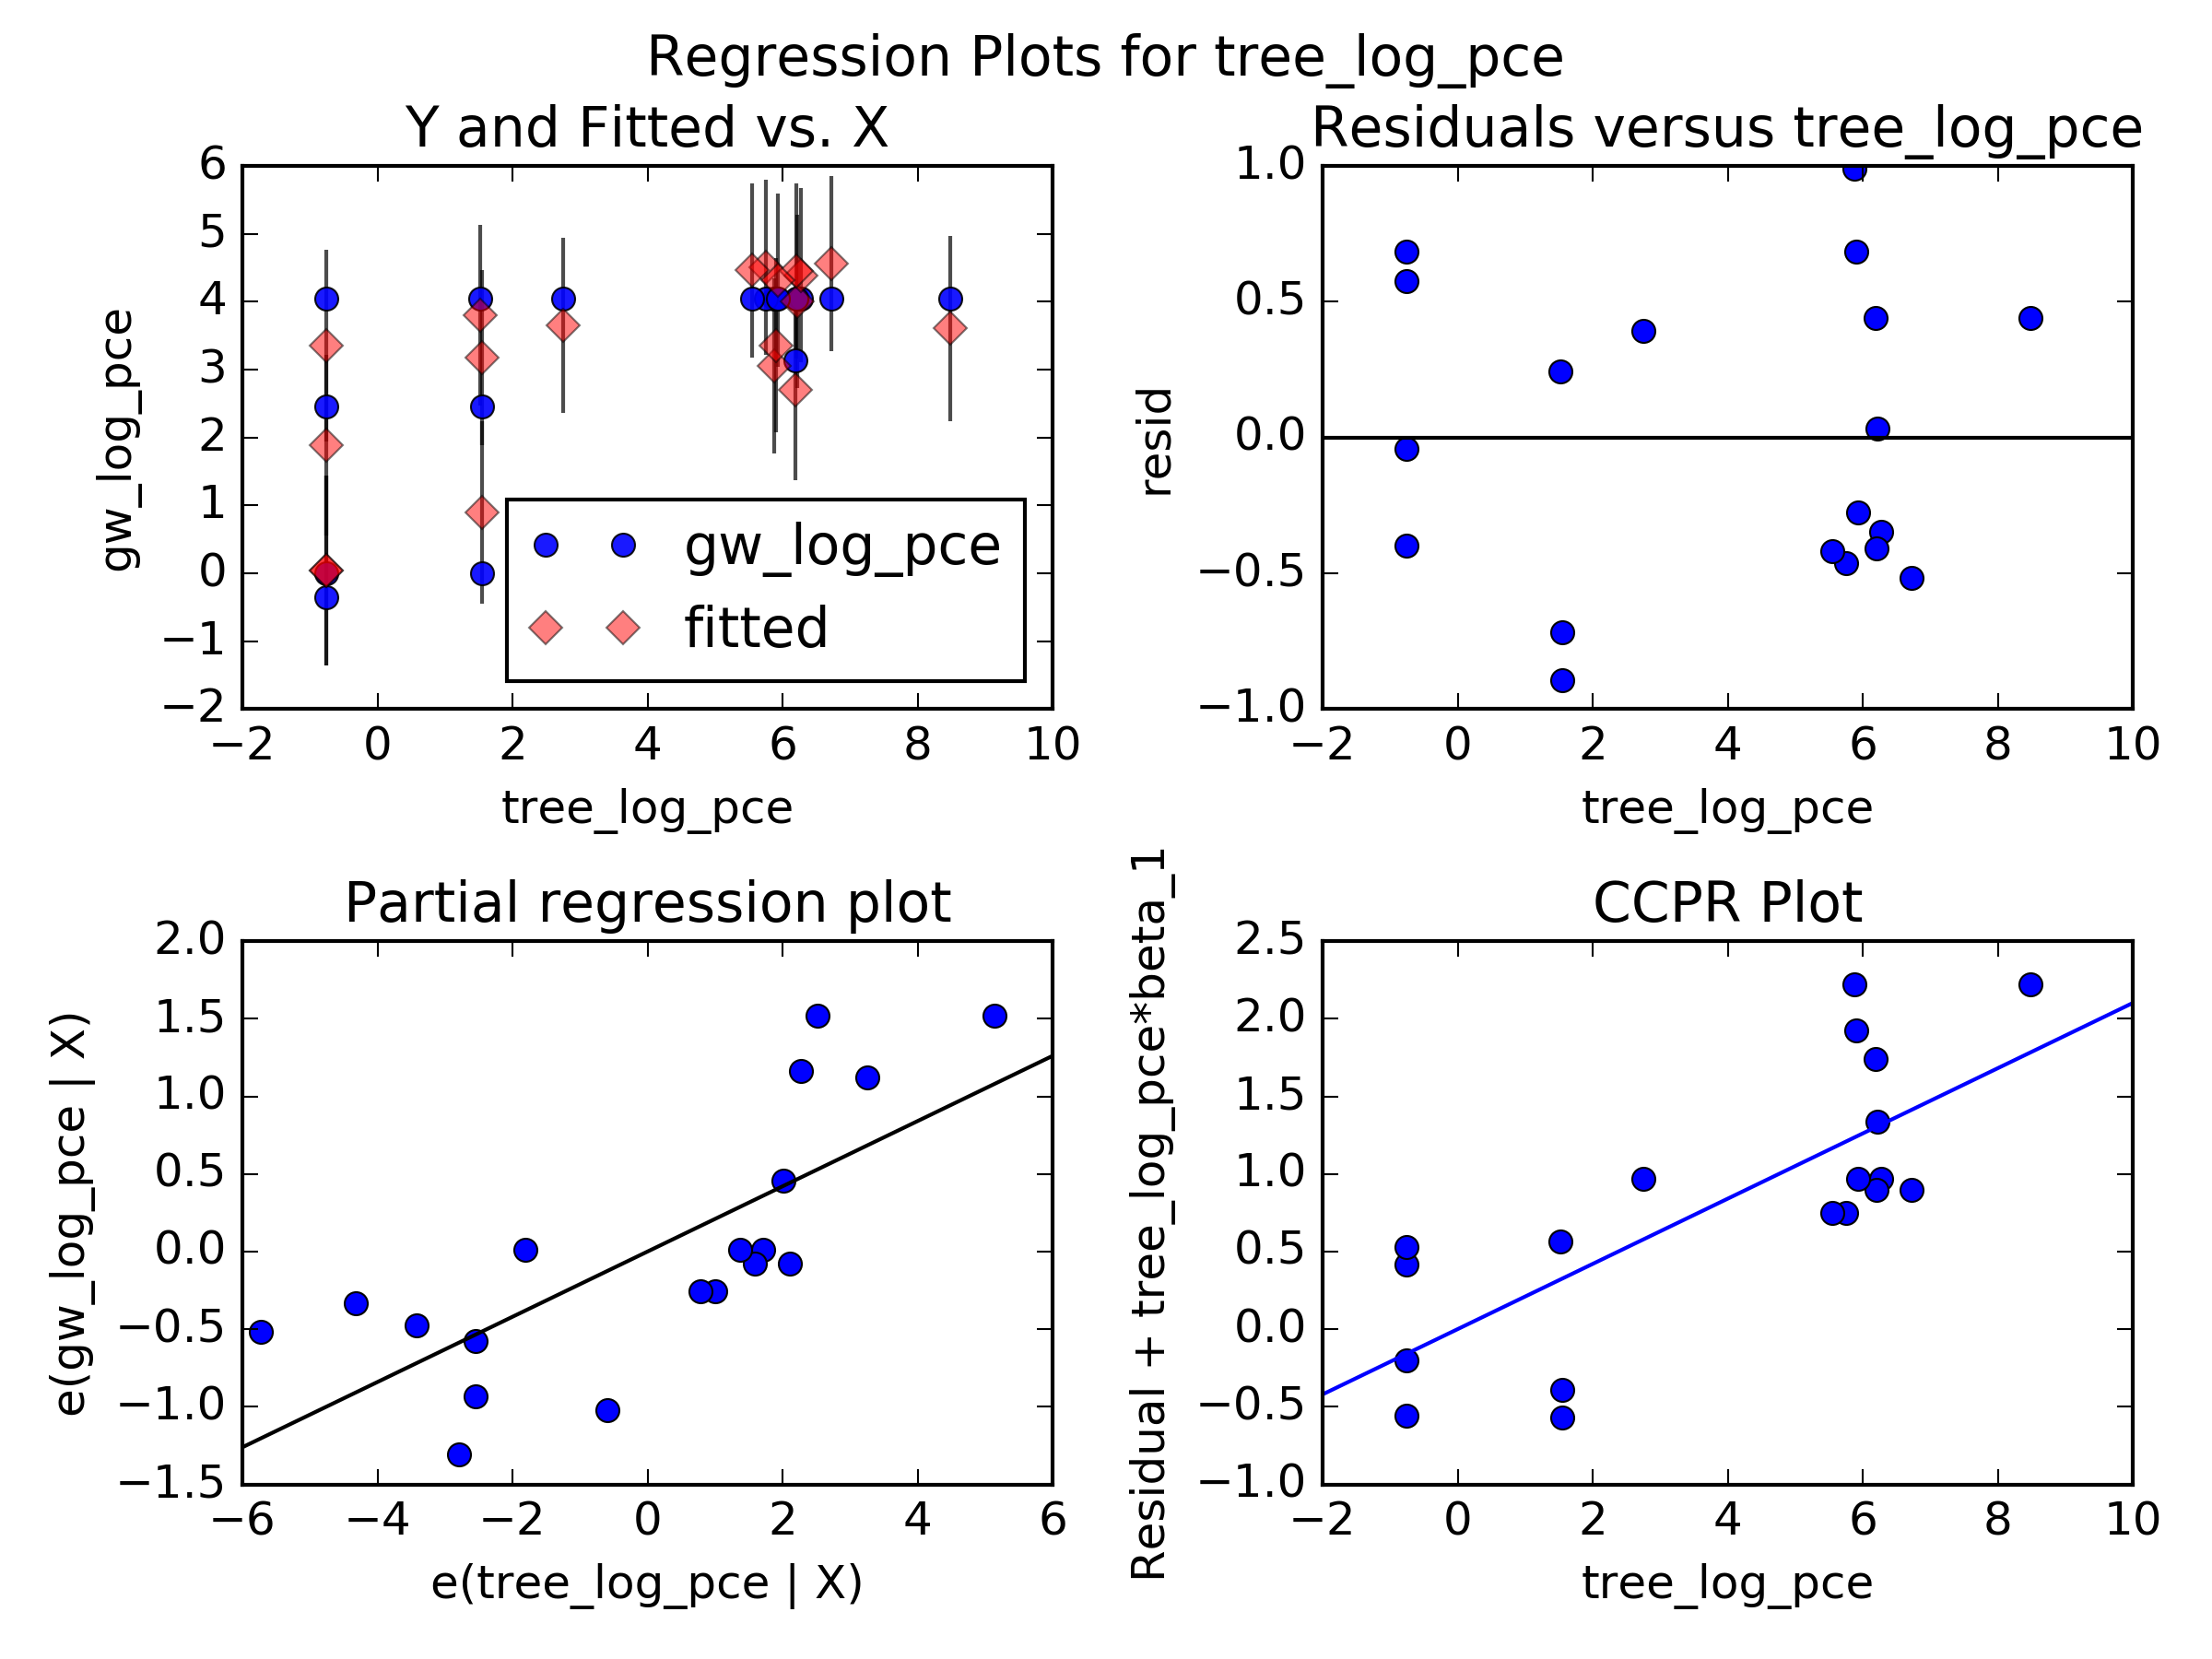

C:\Users\jlwilson\AppData\Local\Continuum\Anaconda2\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:             gw_log_pce   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     57.05
Date:                Fri, 28 Oct 2016   Prob (F-statistic):           5.23e-08
Time:                        13:54:07   Log-Likelihood:                -14.909
No. Observations:                  19   AIC:                             35.82
Df Residuals:                      16   BIC:                             38.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.5900      0.310     11.568   

In [48]:
buffer=60

# tree_buffer_const = 10
gw_082013_buffer=gw_082013_ft1.buffer(buffer)
gw_032016_buffer=gw_032016_ft1.buffer(buffer)
gw_042015_buffer=gw_042015_ft1.buffer(buffer)
gw_092014_buffer=gw_092014_ft1.buffer(buffer)
gw_052013_buffer=gw_052013_ft1.buffer(buffer)

gw_082013_ft.geometry = gw_082013_buffer
gw_032016_ft.geometry = gw_032016_buffer
gw_042015_ft.geometry = gw_042015_buffer
gw_092014_ft.geometry = gw_092014_buffer
gw_052013_ft.geometry = gw_052013_buffer

#Execute a spatial join with wells to trees 
data = []
try:
    trees_gw_052013 = gp.sjoin(gw_052013_ft,trees_052013_ft, how='inner',op='intersects')
    data.append(trees_gw_052013)
except:
    pass
try:
    trees_gw_082013 = gp.sjoin(gw_082013_ft,trees_082013_ft, how='inner',op='intersects')
    data.append(trees_gw_082013)
except:
    pass
try:
    trees_gw_082014 = gp.sjoin(gw_092014_ft,trees_082014_ft, how='inner',op='intersects')
    data.append(trees_gw_082014)
except:
    pass
try:
    trees_gw_052015 = gp.sjoin(gw_042015_ft,trees_052015_ft, how='inner',op='intersects')
    data.append(trees_gw_052015)
except:
    pass
try:
    trees_gw_112015 = gp.sjoin(gw_032016_ft,trees_112015_ft, how='inner',op='intersects')
    data.append(trees_gw_112015)
except:
    pass

trees_gw_pce_shallow = pd.DataFrame()
trees_gw_pce_shallow = trees_gw_pce_shallow.append(data)
trees_gw_pce_shallow.loc[trees_gw_pce_shallow['Interval']=='Deep','Average_PC']=np.nan
trees_gw_pce_shallow.loc[trees_gw_pce_shallow['Interval']=='Very deep','Average_PC']=np.nan
trees_gw_pce_shallow.loc[trees_gw_pce_shallow['Average_PC']<=0.47,'Average_PC']=0.47
trees_gw_pce_shallow['gw_log_pce'] = np.log(trees_gw_pce_shallow['TETRACHLOR'])
trees_gw_pce_shallow['tree_log_pce'] = np.log(trees_gw_pce_shallow['Average_PC'])

trees_gw_pce_deep = pd.DataFrame()
trees_gw_pce_deep = trees_gw_pce_deep.append(data)
trees_gw_pce_deep.loc[trees_gw_pce_shallow['Interval']=='Shallow','Average_PC']=np.nan
trees_gw_pce_deep.loc[trees_gw_pce_shallow['Interval']=='Very shallow','Average_PC']=np.nan
trees_gw_pce_deep.loc[trees_gw_pce_deep['Average_PC']<=0.47,'Average_PC']=0.47
trees_gw_pce_deep['gw_log_pce'] = np.log(trees_gw_pce_deep['TETRACHLOR'])
trees_gw_pce_deep['tree_log_pce'] = np.log(trees_gw_pce_deep['Average_PC'])


trees_gw_tce_shallow = pd.DataFrame()
trees_gw_tce_shallow = trees_gw_tce_shallow.append(data)
trees_gw_tce_shallow.loc[trees_gw_tce_shallow['Interval']=='Deep','Average_TC']=np.nan
trees_gw_tce_shallow.loc[trees_gw_tce_shallow['Interval']=='Very deep','Average_TC']=np.nan
trees_gw_tce_shallow.loc[trees_gw_tce_shallow['TRICHLOROE']==0,'TRICHLOROE']  = np.nan
trees_gw_tce_shallow.loc[trees_gw_tce_shallow['Average_TC']<=7.7,'Average_TC']=np.nan
trees_gw_tce_shallow['gw_log_tce'] = np.log(trees_gw_tce_shallow['TRICHLOROE'])
trees_gw_tce_shallow['tree_log_tce'] = np.log(trees_gw_tce_shallow['Average_TC'])

trees_gw_tce_deep = pd.DataFrame()
trees_gw_tce_deep = trees_gw_tce_deep.append(data)
trees_gw_tce_deep.loc[trees_gw_tce_shallow['Interval']=='Shallow','Average_TC']=np.nan
trees_gw_tce_deep.loc[trees_gw_tce_shallow['Interval']=='Very shallow','Average_TC']=np.nan
trees_gw_tce_deep.loc[trees_gw_tce_deep['TRICHLOROE']==0,'TRICHLOROE']  = np.nan
trees_gw_tce_deep.loc[trees_gw_tce_deep['Average_TC']<=7.7,'Average_TC']=np.nan
trees_gw_tce_deep['gw_log_tce'] = np.log(trees_gw_tce_deep['TRICHLOROE'])
trees_gw_tce_deep['tree_log_tce'] = np.log(trees_gw_tce_deep['Average_TC'])


trees_gw_cfc_shallow = pd.DataFrame()
trees_gw_cfc_shallow = trees_gw_cfc_shallow.append(data)
trees_gw_cfc_shallow.loc[trees_gw_cfc_shallow['Interval']=='Deep','Average_CF']=np.nan
trees_gw_cfc_shallow.loc[trees_gw_cfc_shallow['Interval']=='Very deep','Average_CF']=np.nan
trees_gw_cfc_shallow.loc[trees_gw_cfc_shallow['Average_CF']==0,'Average_CF']=np.nan
trees_gw_cfc_shallow['gw_log_cfc'] = np.log(trees_gw_cfc_shallow['a112_Trich'])
trees_gw_cfc_shallow['tree_log_cfc'] = np.log(trees_gw_cfc_shallow['Average_CF'])

trees_gw_cfc_deep = pd.DataFrame()
trees_gw_cfc_deep = trees_gw_cfc_deep.append(data)
trees_gw_cfc_deep.loc[trees_gw_cfc_shallow['Interval']=='Shallow','Average_CF']=np.nan
trees_gw_cfc_deep.loc[trees_gw_cfc_shallow['Interval']=='Very shallow','Average_CF']=np.nan
trees_gw_cfc_deep.loc[trees_gw_cfc_deep['Average_CF']==0,'Average_CF']=np.nan
trees_gw_cfc_deep['gw_log_cfc'] = np.log(trees_gw_cfc_deep['a112_Trich'])
trees_gw_cfc_deep['tree_log_cfc'] = np.log(trees_gw_cfc_deep['Average_CF'])


# ## Shallow CFC Regression Model   
# try:
#     X1s = sm.add_constant(trees_gw_cfc_shallow.gw_log_cfc)
#     model_cfc = sm.OLS(trees_gw_cfc_shallow.tree_log_cfc,X1s, missing='drop')
#     results_cfc_s = model_cfc.fit()

# #     statsmodels.graphics.regressionplots.plot_regress_exog(results_cfc_s,1)
#     print(results_cfc_s.summary())
    
#     fig =plt.figure(dpi=200)

#     statsmodels.graphics.regressionplots.plot_regress_exog(results_cfc_s,1, fig=fig)

#     plt.savefig("GW_CFC_MLR_Shallow_Reg.pdf")


# except:
#     pass


#     try:
#         rho_cfc_s = scipy.stats.spearmanr(trees_gw_cfc_shallow.gw_log_cfc, trees_gw_cfc_shallow.tree_log_cfc, nan_policy='omit')

#     except:
#         pass
    


# ## Deep CFC Regression Model 
#     try:
#         X1d = sm.add_constant(trees_gw_cfc_deep.tree_log_cfc)
#         model_cfc = sm.OLS(trees_gw_cfc_deep.gw_log_cfc,X1d, missing='drop')
#         results_cfc_d = model_cfc.fit()


#     except:
#         pass


#     try:
#         rho_cfc_d = scipy.stats.spearmanr(trees_gw_cfc_deep.gw_log_cfc, trees_gw_cfc_deep.tree_log_cfc, nan_policy='omit')


#     except:
#         pass


# ## Shallow TCE Regression Model
# try:
#     X2s = sm.add_constant(trees_gw_tce_shallow.tree_log_tce)
#     model_tce = sm.OLS(trees_gw_tce_shallow.gw_log_tce,X2s, missing='drop')
#     results_tce_s = model_tce.fit()

# except:
#     pass


# try:
#     rho_tce_s = scipy.stats.spearmanr(trees_gw_tce_shallow.gw_log_tce, trees_gw_tce_shallow.tree_log_tce, nan_policy='omit')

# except:
#     pass
# results_tce_s.summary()

# ## Deep TCE Regression Model
#     try:
#         X2d = sm.add_constant(trees_gw_tce_deep.tree_log_tce)
#         model_tce = sm.OLS(trees_gw_tce_deep.gw_log_tce,X2s, missing='drop')
#         results_tce_d = model_tce.fit()


#     except:
#         pass


#     try:
#         rho_tce_d = scipy.stats.spearmanr(trees_gw_tce_deep.gw_log_tce, trees_gw_tce_deep.tree_log_tce, nan_policy='omit')


#     except:
#         pass



## Shallow PCE Regression Model 
X = trees_gw_pce_shallow[['tree_log_pce','Average_Tr']]
X3s = sm.add_constant(X)
# X3s = sm.add_constant(trees_gw_pce_shallow.tree_log_pce)
model_pce = sm.OLS(trees_gw_pce_shallow.gw_log_pce,X3s, missing='drop')
results_pce_s = model_pce.fit()

# fig, ax = plt.subplots()
# ax.scatter(trees_gw_pce_shallow.gw_log_pce,trees_gw_pce_shallow.tree_log_pce)
# for gw, tree, species in zip(trees_gw_pce_shallow.gw_log_pce, trees_gw_pce_shallow.tree_log_pce, trees_gw_pce_shallow.Last_Speci):                                       # <--
#     ax.annotate('{}'.format(species),xy=(gw, tree))
# plt.xlabel('Log GW Concentration')
# plt.ylabel('Log Tree Concentration')
# plt.plot([0,results_pce_s.params],[0,5])
fig = plt.figure(dpi=300)
# plt.show()

print(results_pce_s.summary())

statsmodels.graphics.regressionplots.plot_regress_exog(results_pce_s,1,fig=fig)
plt.savefig('TOC_GW_Scatter.pdf')




        
#     try:
#         rho_pce_s = scipy.stats.spearmanr(trees_gw_pce_shallow.gw_log_pce, trees_gw_pce_shallow.tree_log_pce, nan_policy='omit')        
        

#     except:
#         pass

        
        
# ## Deep PCE Regression Model 
#     try:
#         X3d = sm.add_constant(trees_gw_pce_deep.tree_log_pce)
#         model_pce = sm.OLS(trees_gw_pce_deep.gw_log_pce,X3d, missing='drop')
#         results_pce_d = model_pce.fit()

#         stats.iloc[j-1,18]=results_pce_d.rsquared_adj
#         stats.iloc[j-1,19]=results_pce_d.pvalues.loc['const']
#         stats.iloc[j-1,20]=results_pce_d.pvalues.loc['tree_log_pce']
#         stats.iloc[j-1,21]=results_pce_d.df_resid+2

#     except:
#         stats.iloc[j-1,18]=np.nan
#         stats.iloc[j-1,19]=np.nan
#         stats.iloc[j-1,20]=np.nan
#         stats.iloc[j-1,21]=np.nan
        
#     try:
#         rho_pce_d = scipy.stats.spearmanr(trees_gw_pce_deep.gw_log_pce, trees_gw_pce_deep.tree_log_pce, nan_policy='omit')        
        
#         stats.iloc[j-1,22]=rho_pce_d.correlation
#         stats.iloc[j-1,23]=rho_pce_d.pvalue
#     except:
#         stats.iloc[j-1,22]=np.nan
#         stats.iloc[j-1,23]=np.nan           
     

#     j+=1
    


## Looped LR on Shallow and Deep Aquifer

## Looped MLR Tree and Diameter

In [49]:
buffer=10
stats_Depth_MLR = pd.DataFrame(columns=['R2-PCE', 'c','p1', 'p2','n','rho-PCE', 'p','R2-CFC','c', 'p1', 'p2','n','rho-CFC','p', 'R2-TCE', 'c','p1', 'p2','n','rho-TCE', 'p','R2-PCE', 'c','p1', 'p2','n','rho-PCE', 'p','R2-CFC','c', 'p1', 'p2','n','rho-CFC','p','R2-TCE', 'c','p1', 'p2','n','rho-TCE', 'p'], index = range(buffer,310,10))
data=[]
j=1
for x in range(buffer,310,10):
# tree_buffer_const = 10
    gw_082013_buffer=gw_082013_ft1.buffer(x)
    gw_032016_buffer=gw_032016_ft1.buffer(x)
    gw_042015_buffer=gw_042015_ft1.buffer(x)
    gw_092014_buffer=gw_092014_ft1.buffer(x)
    gw_052013_buffer=gw_052013_ft1.buffer(x)

    gw_082013_ft.geometry = gw_082013_buffer
    gw_032016_ft.geometry = gw_032016_buffer
    gw_042015_ft.geometry = gw_042015_buffer
    gw_092014_ft.geometry = gw_092014_buffer
    gw_052013_ft.geometry = gw_052013_buffer

    #Execute a spatial join with wells to trees 
    data = []
    try:
        trees_gw_052013 = gp.sjoin(gw_052013_ft,trees_052013_ft, how='inner',op='intersects')
        data.append(trees_gw_052013)
    except:
        pass
    try:
        trees_gw_082013 = gp.sjoin(gw_082013_ft,trees_082013_ft, how='inner',op='intersects')
        data.append(trees_gw_082013)
    except:
        pass
    try:
        trees_gw_082014 = gp.sjoin(gw_092014_ft,trees_082014_ft, how='inner',op='intersects')
        data.append(trees_gw_082014)
    except:
        pass
    try:
        trees_gw_052015 = gp.sjoin(gw_042015_ft,trees_052015_ft, how='inner',op='intersects')
        data.append(trees_gw_052015)
    except:
        pass
    try:
        trees_gw_112015 = gp.sjoin(gw_032016_ft,trees_112015_ft, how='inner',op='intersects')
        data.append(trees_gw_112015)
    except:
        pass

    trees_gw_pce_shallow = pd.DataFrame()
    trees_gw_pce_shallow = trees_gw_pce_shallow.append(data)
    trees_gw_pce_shallow.loc[trees_gw_pce_shallow['Interval']=='Deep','Average_PC']=np.nan
    trees_gw_pce_shallow.loc[trees_gw_pce_shallow['Interval']=='Very deep','Average_PC']=np.nan
    trees_gw_pce_shallow.loc[trees_gw_pce_shallow['Average_PC']<=0.47,'Average_PC']=0.47
    trees_gw_pce_shallow['gw_log_pce'] = np.log(trees_gw_pce_shallow['TETRACHLOR'])
    trees_gw_pce_shallow['tree_log_pce'] = np.log(trees_gw_pce_shallow['Average_PC'])
    
    trees_gw_pce_deep = pd.DataFrame()
    trees_gw_pce_deep = trees_gw_pce_deep.append(data)
    trees_gw_pce_deep.loc[trees_gw_pce_shallow['Interval']=='Shallow','Average_PC']=np.nan
    trees_gw_pce_deep.loc[trees_gw_pce_shallow['Interval']=='Very shallow','Average_PC']=np.nan
    trees_gw_pce_deep.loc[trees_gw_pce_deep['Average_PC']<=0.47,'Average_PC']=0.47
    trees_gw_pce_deep['gw_log_pce'] = np.log(trees_gw_pce_deep['TETRACHLOR'])
    trees_gw_pce_deep['tree_log_pce'] = np.log(trees_gw_pce_deep['Average_PC'])

    
    trees_gw_tce_shallow = pd.DataFrame()
    trees_gw_tce_shallow = trees_gw_tce_shallow.append(data)
    trees_gw_tce_shallow.loc[trees_gw_tce_shallow['Interval']=='Deep','Average_TC']=np.nan
    trees_gw_tce_shallow.loc[trees_gw_tce_shallow['Interval']=='Very deep','Average_TC']=np.nan
    trees_gw_tce_shallow.loc[trees_gw_tce_shallow['TRICHLOROE']<=1,'TRICHLOROE']  = np.nan
    trees_gw_tce_shallow.loc[trees_gw_tce_shallow['Average_TC']<=7.7,'Average_TC']=np.nan
    trees_gw_tce_shallow['gw_log_tce'] = np.log(trees_gw_tce_shallow['TRICHLOROE'])
    trees_gw_tce_shallow['tree_log_tce'] = np.log(trees_gw_tce_shallow['Average_TC'])
    
    trees_gw_tce_deep = pd.DataFrame()
    trees_gw_tce_deep = trees_gw_tce_deep.append(data)
    trees_gw_tce_deep.loc[trees_gw_tce_shallow['Interval']=='Shallow','Average_TC']=np.nan
    trees_gw_tce_deep.loc[trees_gw_tce_shallow['Interval']=='Very shallow','Average_TC']=np.nan
    trees_gw_tce_deep.loc[trees_gw_tce_deep['TRICHLOROE']<=1,'TRICHLOROE']  = np.nan
    trees_gw_tce_deep.loc[trees_gw_tce_deep['Average_TC']<=7.7,'Average_TC']=np.nan
    trees_gw_tce_deep['gw_log_tce'] = np.log(trees_gw_tce_deep['TRICHLOROE'])
    trees_gw_tce_deep['tree_log_tce'] = np.log(trees_gw_tce_deep['Average_TC'])
    
    
    trees_gw_cfc_shallow = pd.DataFrame()
    trees_gw_cfc_shallow = trees_gw_cfc_shallow.append(data)
    trees_gw_cfc_shallow.loc[trees_gw_cfc_shallow['Interval']=='Deep','Average_CF']=np.nan
    trees_gw_cfc_shallow.loc[trees_gw_cfc_shallow['Interval']=='Very deep','Average_CF']=np.nan
    trees_gw_cfc_shallow.loc[trees_gw_cfc_shallow['Average_CF']==0,'Average_CF']=np.nan
    trees_gw_cfc_shallow['gw_log_cfc'] = np.log(trees_gw_cfc_shallow['a112_Trich'])
    trees_gw_cfc_shallow['tree_log_cfc'] = np.log(trees_gw_cfc_shallow['Average_CF'])

    trees_gw_cfc_deep = pd.DataFrame()
    trees_gw_cfc_deep = trees_gw_cfc_deep.append(data)
    trees_gw_cfc_deep.loc[trees_gw_cfc_shallow['Interval']=='Shallow','Average_CF']=np.nan
    trees_gw_cfc_deep.loc[trees_gw_cfc_shallow['Interval']=='Very shallow','Average_CF']=np.nan
    trees_gw_cfc_deep.loc[trees_gw_cfc_deep['Average_CF']==0,'Average_CF']=np.nan
    trees_gw_cfc_deep['gw_log_cfc'] = np.log(trees_gw_cfc_deep['a112_Trich'])
    trees_gw_cfc_deep['tree_log_cfc'] = np.log(trees_gw_cfc_deep['Average_CF'])
   
    
## Shallow CFC Regression Model   
    try:
        X_cfc_s = trees_gw_cfc_shallow[['tree_log_cfc','DiaBin']]
        X1s = sm.add_constant(X_cfc_s)
        model_cfc = sm.OLS(trees_gw_cfc_shallow.gw_log_cfc,X1s, missing='drop')
        results_cfc_s = model_cfc.fit()

        stats_Depth_MLR.iloc[j-1,7]=results_cfc_s.rsquared_adj
        stats_Depth_MLR.iloc[j-1,8]=results_cfc_s.pvalues.loc['const']
        stats_Depth_MLR.iloc[j-1,9]=results_cfc_s.pvalues.loc['tree_log_cfc']
        stats_Depth_MLR.iloc[j-1,10]=results_cfc_s.pvalues.loc['DiaBin']
        stats_Depth_MLR.iloc[j-1,11]=results_cfc_s.df_resid+3

    except:
        stats_Depth_MLR.iloc[j-1,7]=np.nan
        stats_Depth_MLR.iloc[j-1,8]=np.nan
        stats_Depth_MLR.iloc[j-1,9]=np.nan
        stats_Depth_MLR.iloc[j-1,10]=np.nan
        stats_Depth_MLR.iloc[j-1,11]=np.nan
        
    
    try:
        rho_cfc_s = scipy.stats.spearmanr(trees_gw_cfc_shallow.gw_log_cfc, trees_gw_cfc_shallow.tree_log_cfc, nan_policy='omit')
        
        stats_Depth_MLR.iloc[j-1,12]=rho_cfc_s.correlation
        stats_Depth_MLR.iloc[j-1,13]=rho_cfc_s.pvalue
    except:
        stats_Depth_MLR.iloc[j-1,12]=np.nan
        stats_Depth_MLR.iloc[j-1,13]=np.nan        
## Deep CFC Regression Model 
    try:
        X_cfc_d = trees_gw_cfc_deep[['tree_log_cfc','DiaBin']]
        X1d = sm.add_constant(X_cfc_d)
        model_cfc = sm.OLS(trees_gw_cfc_deep.gw_log_cfc,X1d, missing='drop')
        results_cfc_d = model_cfc.fit()

        stats_Depth_MLR.iloc[j-1,28]=results_cfc_d.rsquared_adj
        stats_Depth_MLR.iloc[j-1,29]=results_cfc_d.pvalues.loc['const']
        stats_Depth_MLR.iloc[j-1,30]=results_cfc_d.pvalues.loc['tree_log_cfc']
        stats_Depth_MLR.iloc[j-1,31]=results_cfc_d.pvalues.loc['DiaBin']
        stats_Depth_MLR.iloc[j-1,32]=results_cfc_d.df_resid+3

    except:
        stats_Depth_MLR.iloc[j-1,28]=np.nan
        stats_Depth_MLR.iloc[j-1,29]=np.nan
        stats_Depth_MLR.iloc[j-1,30]=np.nan
        stats_Depth_MLR.iloc[j-1,31]=np.nan
        stats_Depth_MLR.iloc[j-1,32]=np.nan
    
    try:
        rho_cfc_d = scipy.stats.spearmanr(trees_gw_cfc_deep.gw_log_cfc, trees_gw_cfc_deep.tree_log_cfc, nan_policy='omit')
        
        stats_Depth_MLR.iloc[j-1,33]=rho_cfc_d.correlation
        stats_Depth_MLR.iloc[j-1,34]=rho_cfc_d.pvalue
    except:
        stats_Depth_MLR.iloc[j-1,33]=np.nan
        stats_Depth_MLR.iloc[j-1,34]=np.nan 
        
        
## Shallow TCE Regression Model
    try:
        X_tce_s = trees_gw_tce_shallow[['tree_log_tce','DiaBin']]
        X2s = sm.add_constant(X_tce_s)
        model_tce = sm.OLS(trees_gw_tce_shallow.gw_log_tce,X2s, missing='drop')
        results_tce_s = model_tce.fit()

        stats_Depth_MLR.iloc[j-1,14]=results_tce_s.rsquared_adj
        stats_Depth_MLR.iloc[j-1,15]=results_tce_s.pvalues.loc['const']
        stats_Depth_MLR.iloc[j-1,16]=results_tce_s.pvalues.loc['tree_log_tce']
        stats_Depth_MLR.iloc[j-1,17]=results_tce_s.pvalues.loc['DiaBin']
        stats_Depth_MLR.iloc[j-1,18]=results_tce_s.df_resid+3

    except:
        stats_Depth_MLR.iloc[j-1,14]=np.nan
        stats_Depth_MLR.iloc[j-1,15]=np.nan
        stats_Depth_MLR.iloc[j-1,16]=np.nan
        stats_Depth_MLR.iloc[j-1,17]=np.nan
        stats_Depth_MLR.iloc[j-1,18]=np.nan
        
    try:
        rho_tce_s = scipy.stats.spearmanr(trees_gw_tce_shallow.gw_log_tce, trees_gw_tce_shallow.tree_log_tce, nan_policy='omit')
        
        stats_Depth_MLR.iloc[j-1,19]=rho_tce_s.correlation
        stats_Depth_MLR.iloc[j-1,20]=rho_tce_s.pvalue
    except:
        stats_Depth_MLR.iloc[j-1,19]=np.nan
        stats_Depth_MLR.iloc[j-1,20]=np.nan
        
## Deep TCE Regression Model
    try:
        X_tce_d = trees_gw_tce_deep[['tree_log_tce','DiaBin']]
        X2d = sm.add_constant(X_tce_d)
        model_tce = sm.OLS(trees_gw_tce_deep.gw_log_tce,X2d, missing='drop')
        results_tce_d = model_tce.fit()

        stats_Depth_MLR.iloc[j-1,35]=results_tce_d.rsquared_adj
        stats_Depth_MLR.iloc[j-1,36]=results_tce_d.pvalues.loc['const']
        stats_Depth_MLR.iloc[j-1,37]=results_tce_d.pvalues.loc['tree_log_tce']
        stats_Depth_MLR.iloc[j-1,38]=results_tce_d.pvalues.loc['DiaBin']
        stats_Depth_MLR.iloc[j-1,39]=results_tce_d.df_resid+3

    except:
        stats_Depth_MLR.iloc[j-1,35]=np.nan
        stats_Depth_MLR.iloc[j-1,36]=np.nan
        stats_Depth_MLR.iloc[j-1,37]=np.nan
        stats_Depth_MLR.iloc[j-1,38]=np.nan
        stats_Depth_MLR.iloc[j-1,39]=np.nan
        
    try:
        rho_tce_d = scipy.stats.spearmanr(trees_gw_tce_deep.gw_log_tce, trees_gw_tce_deep.tree_log_tce, nan_policy='omit')
        
        stats_Depth_MLR.iloc[j-1,40]=rho_cfc_d.correlation
        stats_Depth_MLR.iloc[j-1,41]=rho_cfc_d.pvalue
    except:
        stats_Depth_MLR.iloc[j-1,40]=np.nan
        stats_Depth_MLR.iloc[j-1,41]=np.nan
        
        
## Shallow PCE Regression Model 
    try:
        X_pce_s = trees_gw_pce_shallow[['tree_log_pce','DiaBin']]
        X3s = sm.add_constant(X_pce_s)
        model_pce = sm.OLS(trees_gw_pce_shallow.gw_log_pce,X3s, missing='drop')
        results_pce_s = model_pce.fit()

        stats_Depth_MLR.iloc[j-1,0]=results_pce_s.rsquared_adj
        stats_Depth_MLR.iloc[j-1,1]=results_pce_s.pvalues.loc['const']
        stats_Depth_MLR.iloc[j-1,2]=results_pce_s.pvalues.loc['tree_log_pce']
        stats_Depth_MLR.iloc[j-1,3]=results_pce_s.pvalues.loc['DiaBin']
        stats_Depth_MLR.iloc[j-1,4]=results_pce_s.df_resid+3

    except:
        stats_Depth_MLR.iloc[j-1,0]=np.nan
        stats_Depth_MLR.iloc[j-1,1]=np.nan
        stats_Depth_MLR.iloc[j-1,2]=np.nan
        stats_Depth_MLR.iloc[j-1,3]=np.nan
        stats_Depth_MLR.iloc[j-1,4]=np.nan
        
    try:
        rho_pce_s = scipy.stats.spearmanr(trees_gw_pce_shallow.gw_log_pce, trees_gw_pce_shallow.tree_log_pce, nan_policy='omit')        
        
        stats_Depth_MLR.iloc[j-1,5]=rho_pce_s.correlation
        stats_Depth_MLR.iloc[j-1,6]=rho_pce_s.pvalue
    except ValueError:
        stats_Depth_MLR.iloc[j-1,5]=np.nan
        stats_Depth_MLR.iloc[j-1,6]=np.nan  
        
        
## Deep PCE Regression Model 
    try:
        X_pce_d = trees_gw_pce_deep[['tree_log_pce','DiaBin']]
        X3d = sm.add_constant(X_pce_d)
        model_pce = sm.OLS(trees_gw_pce_deep.gw_log_pce,X3d, missing='drop')
        results_pce_d = model_pce.fit()

        stats_Depth_MLR.iloc[j-1,21]=results_pce_d.rsquared_adj
        stats_Depth_MLR.iloc[j-1,22]=results_pce_d.pvalues.loc['const']
        stats_Depth_MLR.iloc[j-1,23]=results_pce_d.pvalues.loc['tree_log_pce']
        stats_Depth_MLR.iloc[j-1,24]=results_pce_d.pvalues.loc['DiaBin']
        stats_Depth_MLR.iloc[j-1,25]=results_pce_d.df_resid+3

    except:
        stats_Depth_MLR.iloc[j-1,21]=np.nan
        stats_Depth_MLR.iloc[j-1,22]=np.nan
        stats_Depth_MLR.iloc[j-1,23]=np.nan
        stats_Depth_MLR.iloc[j-1,24]=np.nan
        stats_Depth_MLR.iloc[j-1,25]=np.nan
        
    try:
        rho_pce_d = scipy.stats.spearmanr(trees_gw_pce_deep.gw_log_pce, trees_gw_pce_deep.tree_log_pce, nan_policy='omit')        
        
        stats_Depth_MLR.iloc[j-1,26]=rho_pce_d.correlation
        stats_Depth_MLR.iloc[j-1,27]=rho_pce_d.pvalue
    except:
        stats_Depth_MLR.iloc[j-1,26]=np.nan
        stats_Depth_MLR.iloc[j-1,27]=np.nan           
     

    j+=1
    
else:
    print('done')
    
# stats_Depth_MLR.to_excel('U:\MST\Vienna\Statistics\Tree_GW_stats_Depth_MLR_MLR_aboveMDL_Depth.xlsx')

done


In [50]:
stats_Depth_MLR

,R2-PCE,c,p1,p2,n,rho-PCE,p,R2-CFC,c,p1,p2,n,rho-CFC,p,R2-TCE,c,p1,p2,n,rho-TCE,p,R2-PCE,c,p1,p2,n,rho-PCE,p,R2-CFC,c,p1,p2,n,rho-CFC,p,R2-TCE,c,p1,p2,n,rho-TCE,p
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,0.5,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,0.815999,0.154501,0.062611,0.14901,5,0.875,0.0520455487438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.684739,0.136313,0.269536,0.42366,4,-0.65,0.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,0.618829,0.0320997,0.0447804,0.138233,7,0.830357,0.0207318420744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.22685,0.058415,0.669311,0.167889,6,-0.428571,0.396501457726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,0.540295,0.00027421,0.0318326,0.0225483,11,0.570455,0.0668682006725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023515,0.0603764,0.678164,0.186754,10,-0.260606,0.467089054386,-inf,NaN,NaN,NaN,3,0.5,nan,NaN,NaN,NaN,NaN,3,NaN,NaN
60,0.785525,1.13405e-07,0.00161577,3.94868e-05,19,0.640789,0.00311540861479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20241,0.0214564,0.356259,0.0629091,14,0.164835,0.573346405013,-inf,NaN,NaN,NaN,3,0.5,nan,NaN,NaN,NaN,NaN,3,NaN,NaN
70,0.634585,2.884e-11,0.000999161,2.92515e-05,27,0.584096,0.00137956919985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0340396,0.0317047,0.546076,0.172576,18,0.151187,0.549278915502,-inf,NaN,NaN,NaN,3,0.5,nan,NaN,NaN,NaN,NaN,3,NaN,NaN
80,0.483627,2.86283e-21,0.000107889,3.23723e-06,45,0.499901,0.000471489544657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0194803,0.00101444,0.79151,0.118479,31,0.0264113,0.887843699095,1,4.65862e-30,0.601045,8.98003e-29,5,0.75,0.144293612814,NaN,NaN,NaN,NaN,3,NaN,NaN
90,0.430873,2.78375e-30,0.000182494,3.43572e-07,63,0.50534,2.39819611491e-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0375895,0.00046245,0.955612,0.440261,39,-0.0399798,0.809053875397,1,4.65862e-30,0.601045,8.98003e-29,5,0.75,0.144293612814,NaN,NaN,NaN,NaN,3,NaN,NaN
100,0.366066,1.76842e-30,0.000581598,5.71048e-07,74,0.43609,0.00010282001598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0201636,0.000193485,0.916394,0.290382,44,-0.0154686,0.920614789116,1,4.65862e-30,0.601045,8.98003e-29,5,0.75,0.144293612814,NaN,NaN,NaN,NaN,3,NaN,NaN


<IPython.core.display.Javascript object>


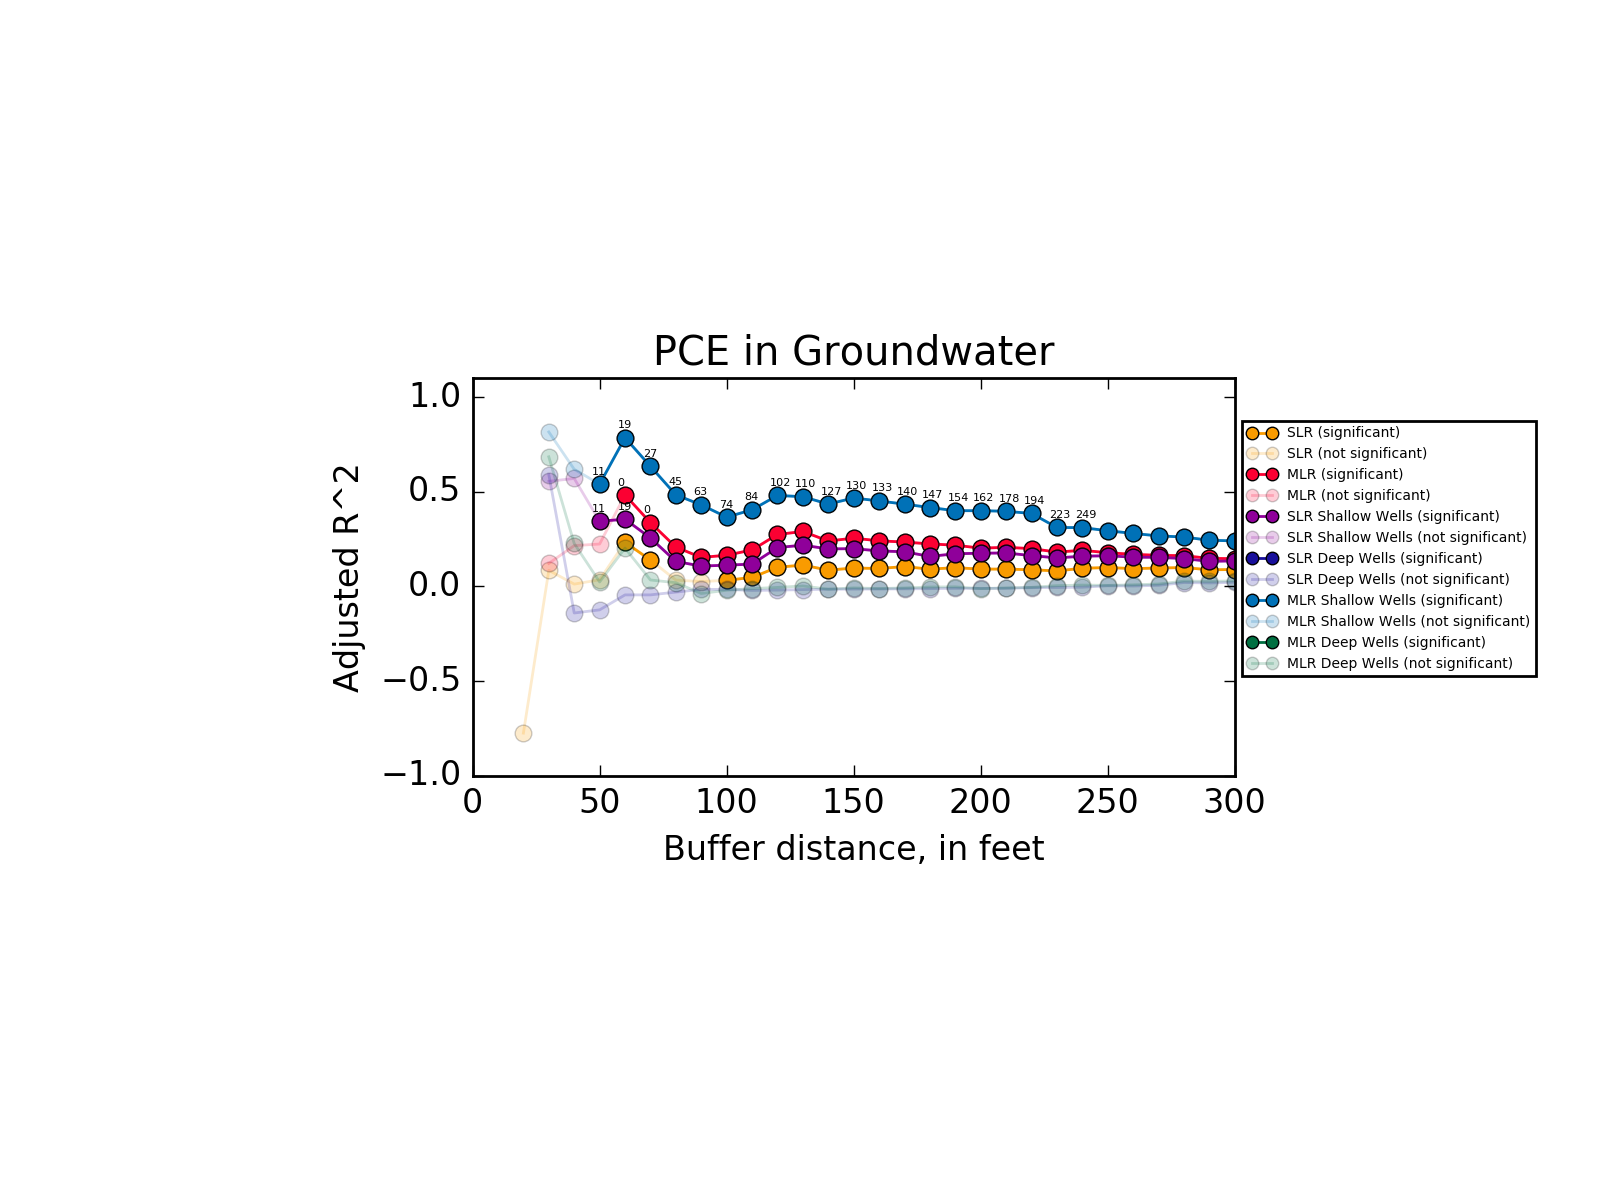

In [51]:
from matplotlib.legend_handler import HandlerLine2D

stats_SLR['PCE_plot']=np.nan
stats_MLR['PCE_plot']=np.nan
stats_Depth_SLR['PCE_plot_s']=np.nan
stats_Depth_SLR['PCE_plot_d']=np.nan
stats_Depth_MLR['PCE_plot_s']=np.nan
stats_Depth_MLR['PCE_plot_d']=np.nan

stats_SLR.loc[(stats_SLR.iloc[:,1]<0.05)&(stats_SLR.iloc[:,2]<0.05),'PCE_plot']=stats_SLR.iloc[:,0]
stats_MLR.loc[(stats_MLR.iloc[:,1]<0.05)&(stats_MLR.iloc[:,2]<0.05)&(stats_MLR.iloc[:,3]<0.05),'PCE_plot']=stats_MLR.iloc[:,0]
stats_Depth_SLR.loc[(stats_Depth_SLR.iloc[:,1]<0.05)&(stats_Depth_SLR.iloc[:,2]<0.05),'PCE_plot_s']=stats_Depth_SLR.iloc[:,0]
stats_Depth_SLR.loc[(stats_Depth_SLR.iloc[:,15]<0.05)&(stats_Depth_SLR.iloc[:,16]<0.05),'PCE_plot_d']=stats_Depth_SLR.iloc[:,18]

stats_Depth_MLR.loc[(stats_Depth_MLR.iloc[:,1]<0.05)&(stats_Depth_MLR.iloc[:,2]<0.05)&(stats_Depth_MLR.iloc[:,3]<0.05),'PCE_plot_s']=stats_Depth_MLR.iloc[:,0]
stats_Depth_MLR.loc[(stats_Depth_MLR.iloc[:,22]<0.05)&(stats_Depth_MLR.iloc[:,23]<0.05)&(stats_Depth_MLR.iloc[:,24]<0.05),'PCE_plot_d']=stats_Depth_MLR.iloc[:,21]

fig, ax = plt.subplots(dpi=200)

slr, = ax.plot(stats_SLR['PCE_plot'],'-o', label='SLR (significant)', c='#F99B00')
slr, = ax.plot(stats_SLR['R2-PCE'],'-o', label='SLR (not significant)', alpha=0.2,c='#F99B00')

mlr, = ax.plot(stats_MLR['PCE_plot'],'-o',label='MLR (significant)',c='#FB0032')
mlr, = ax.plot(stats_MLR['R2-PCE'],'-o',label='MLR (not significant)',alpha=0.2,c='#FB0032')

slr_s, = ax.plot(stats_Depth_SLR['PCE_plot_s'],'-o',label='SLR Shallow Wells (significant)',c='#8F009A')
slr_s, = ax.plot(stats_Depth_SLR.iloc[:,0],'-o',label='SLR Shallow Wells (not significant)',alpha=0.2,c='#8F009A')

slr_d, = ax.plot(stats_Depth_SLR['PCE_plot_d'],'-o',label='SLR Deep Wells (significant)',c='#180F9B')
slr_d, = ax.plot(stats_Depth_SLR.iloc[:,18],'-o',label='SLR Deep Wells (not significant)',alpha=0.2,c='#180F9B')
mlr_s, = ax.plot(stats_Depth_MLR['PCE_plot_s'],'-o',label='MLR Shallow Wells (significant)',c='#0071B7')
mlr_s, = ax.plot(stats_Depth_MLR.iloc[:,0],'-o',label='MLR Shallow Wells (not significant)', alpha=0.2,c='#0071B7')

mlr_d, = ax.plot(stats_Depth_MLR['PCE_plot_d'],'-o',label='MLR Deep Wells (significant)',c='#006F41')
mlr_d, = ax.plot(stats_Depth_MLR.iloc[:,21],'-o',alpha=0.2,label='MLR Deep Wells (not significant)',c='#006F41')


plt.legend(handler_map={mlr: HandlerLine2D(numpoints=2)}, loc=(1.01,0.25),fontsize=5, ncol=1,markerscale=0.75)

for index, r2, n in zip(stats_SLR.index, stats_SLR['PCE_plot'], stats_SLR.iloc[:,3]):                                       # <--
    if r2>0.3:
        ax.annotate('{}'.format(int(n)),xy=(index-3, r2+.05),fontsize=4)
for index, r2, n in zip(stats_MLR.index, stats_MLR['PCE_plot'], stats_SLR.iloc[:,4]):                                       # <--
    if r2>0.3:
        ax.annotate('{}'.format(int(n)),xy=(index-3, r2+.05),fontsize=4)
for index, r2, n in zip(stats_Depth_SLR.index, stats_Depth_SLR['PCE_plot_s'], stats_Depth_SLR.iloc[:,3]):                                       # <--
    if r2>0.3:
        ax.annotate('{}'.format(int(n)),xy=(index-3, r2+.05),fontsize=4)
for index, r2, n in zip(stats_Depth_SLR.index, stats_Depth_SLR['PCE_plot_d'], stats_Depth_SLR.iloc[:,22]):                                       # <--
    if r2>0.3:
        ax.annotate('{}'.format(int(n)),xy=(index-3, r2+.05),fontsize=4)
for index, r2, n in zip(stats_Depth_MLR.index, stats_Depth_MLR['PCE_plot_s'], stats_Depth_MLR.iloc[:,4]):                                       # <--
    if r2>0.3:
        ax.annotate('{}'.format(int(n)),xy=(index-3, r2+.05),fontsize=4)
for index, r2, n in zip(stats_Depth_MLR.index, stats_Depth_MLR['PCE_plot_d'], stats_Depth_MLR.iloc[:,25]):                                       # <--
    if r2>0.3:
        ax.annotate('{}'.format(int(n)),xy=(index-3, r2+.05),fontsize=4)
                                                                       

plt.xlabel('Buffer distance, in feet')
plt.ylabel('Adjusted R^2')
plt.ylim(-1,1.1)
plt.title('PCE in Groundwater')
plt.tight_layout(pad=10)
plt.savefig("GW_PCE.pdf")

    
# plt.show()

## R2 Curve for CFC-113

<IPython.core.display.Javascript object>


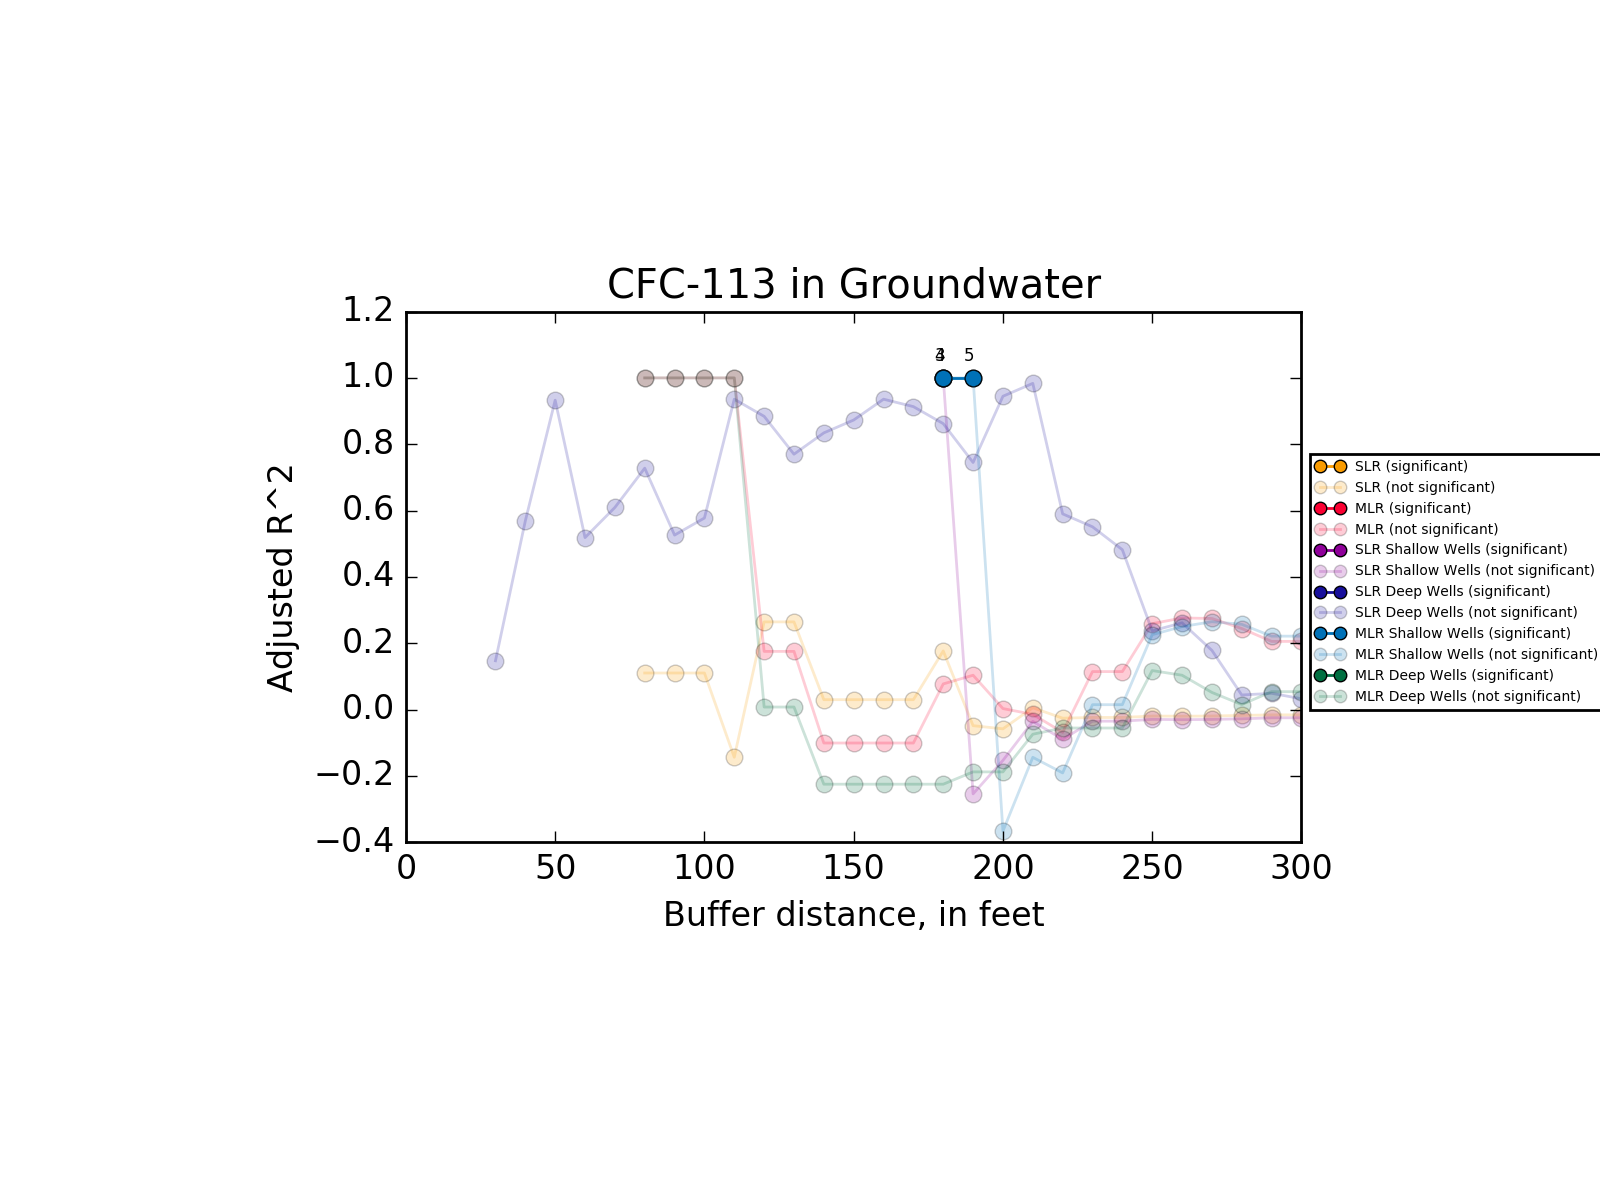

In [52]:
from matplotlib.legend_handler import HandlerLine2D

stats_SLR['CFC_plot']=np.nan
stats_MLR['CFC_plot']=np.nan
stats_Depth_SLR['CFC_plot_s']=np.nan
stats_Depth_SLR['CFC_plot_d']=np.nan
stats_Depth_MLR['CFC_plot_s']=np.nan
stats_Depth_MLR['CFC_plot_d']=np.nan

stats_SLR.loc[(stats_SLR.iloc[:,7]<0.05)&(stats_SLR.iloc[:,8]<0.05),'CFC_plot']=stats_SLR.iloc[:,6]
stats_MLR.loc[(stats_MLR.iloc[:,6]<0.05)&(stats_MLR.iloc[:,7]<0.05)&(stats_MLR.iloc[:,8]<0.05),'CFC_plot']=stats_MLR.iloc[:,5]
stats_Depth_SLR.loc[(stats_Depth_SLR.iloc[:,7]<0.05)&(stats_Depth_SLR.iloc[:,8]<0.05),'CFC_plot_s']=stats_Depth_SLR.iloc[:,6]
stats_Depth_SLR.loc[(stats_Depth_SLR.iloc[:,21]<0.05)&(stats_Depth_SLR.iloc[:,22]<0.05),'CFC_plot_d']=stats_Depth_SLR.iloc[:,20]

stats_Depth_MLR.loc[(stats_Depth_MLR.iloc[:,8]<0.05)&(stats_Depth_MLR.iloc[:,9]<0.05)&(stats_Depth_MLR.iloc[:,10]<0.05),'CFC_plot_s']=stats_Depth_MLR.iloc[:,7]
stats_Depth_MLR.loc[(stats_Depth_MLR.iloc[:,29]<0.05)&(stats_Depth_MLR.iloc[:,30]<0.05)&(stats_Depth_MLR.iloc[:,31]<0.05),'CFC_plot_d']=stats_Depth_MLR.iloc[:,28]

fig, ax = plt.subplots(dpi=200)

slr, = ax.plot(stats_SLR['CFC_plot'],'-o', label='SLR (significant)', c='#F99B00')
slr, = ax.plot(stats_SLR['R2-CFC'],'-o', label='SLR (not significant)', alpha=0.2,c='#F99B00')

mlr, = ax.plot(stats_MLR['CFC_plot'],'-o',label='MLR (significant)',c='#FB0032')
mlr, = ax.plot(stats_MLR['R2-CFC'],'-o',label='MLR (not significant)',alpha=0.2,c='#FB0032')

slr_s, = ax.plot(stats_Depth_SLR['CFC_plot_s'],'-o',label='SLR Shallow Wells (significant)',c='#8F009A')
slr_s, = ax.plot(stats_Depth_SLR.iloc[:,6],'-o',alpha=0.2,label='SLR Shallow Wells (not significant)',c='#8F009A')

slr_d, = ax.plot(stats_Depth_SLR['CFC_plot_d'],'-o',label='SLR Deep Wells (significant)',c='#180F9B')
slr_d, = ax.plot(stats_Depth_SLR.iloc[:,20],'-o',alpha=0.2,label='SLR Deep Wells (not significant)',c='#180F9B')
mlr_s, = ax.plot(stats_Depth_MLR['CFC_plot_s'],'-o',label='MLR Shallow Wells (significant)',c='#0071B7')
mlr_s, = ax.plot(stats_Depth_MLR.iloc[:,7],'-o',alpha=0.2,label='MLR Shallow Wells (not significant)',c='#0071B7')

mlr_d, = ax.plot(stats_Depth_MLR['CFC_plot_d'],'-o',label='MLR Deep Wells (significant)',c='#006F41')
mlr_d, = ax.plot(stats_Depth_MLR.iloc[:,28],'-o',alpha=0.2,label='MLR Deep Wells (not significant)',c='#006F41')


plt.legend(handler_map={mlr: HandlerLine2D(numpoints=2)}, loc=(1.01,0.25),fontsize=5, ncol=1,markerscale=0.75)

for index, r2, n in zip(stats_SLR.index, stats_SLR['CFC_plot'], stats_SLR.iloc[:,9]):                                       # <--
    if r2>0.7:
        ax.annotate('{}'.format(int(n)),xy=(index-3, r2+.05),fontsize=6)
for index, r2, n in zip(stats_MLR.index, stats_MLR['CFC_plot'], stats_SLR.iloc[:,9]):                                       # <--
    if r2>0.7:
        ax.annotate('{}'.format(int(n)),xy=(index-3, r2+.05),fontsize=6)
for index, r2, n in zip(stats_Depth_SLR.index, stats_Depth_SLR['CFC_plot_s'], stats_Depth_SLR.iloc[:,9]):                                       # <--
    if r2>0.7:
        ax.annotate('{}'.format(int(n)),xy=(index-3, r2+.05),fontsize=6)
for index, r2, n in zip(stats_Depth_SLR.index, stats_Depth_SLR['CFC_plot_d'], stats_Depth_SLR.iloc[:,23]):                                       # <--
    if r2>0.7:
        ax.annotate('{}'.format(int(n)),xy=(index-3, r2+.05),fontsize=6)
for index, r2, n in zip(stats_Depth_MLR.index, stats_Depth_MLR['CFC_plot_s'], stats_Depth_MLR.iloc[:,11]):                                       # <--
    if r2>0.7:
        ax.annotate('{}'.format(int(n)),xy=(index-3, r2+.05),fontsize=6)
for index, r2, n in zip(stats_Depth_MLR.index, stats_Depth_MLR['CFC_plot_d'], stats_Depth_MLR.iloc[:,32]):                                       # <--
    if r2>0.7:
        ax.annotate('{}'.format(int(n)),xy=(index-3, r2+.05),fontsize=6)

# for gw, tree, species in zip(trees_gw_CFC_shallow.gw_log_CFC, trees_gw_CFC_shallow.tree_log_CFC, trees_gw_CFC_shallow.Last_Speci):                                       # <--
#     ax.annotate('{}'.format(species),xy=(gw, tree))
plt.xlabel('Buffer distance, in feet')
plt.ylabel('Adjusted R^2')
plt.title('CFC-113 in Groundwater')
plt.tight_layout(pad=8)
plt.savefig("GW_CFC.pdf")

    
plt.show()

## R2 Curve for TCE

<IPython.core.display.Javascript object>


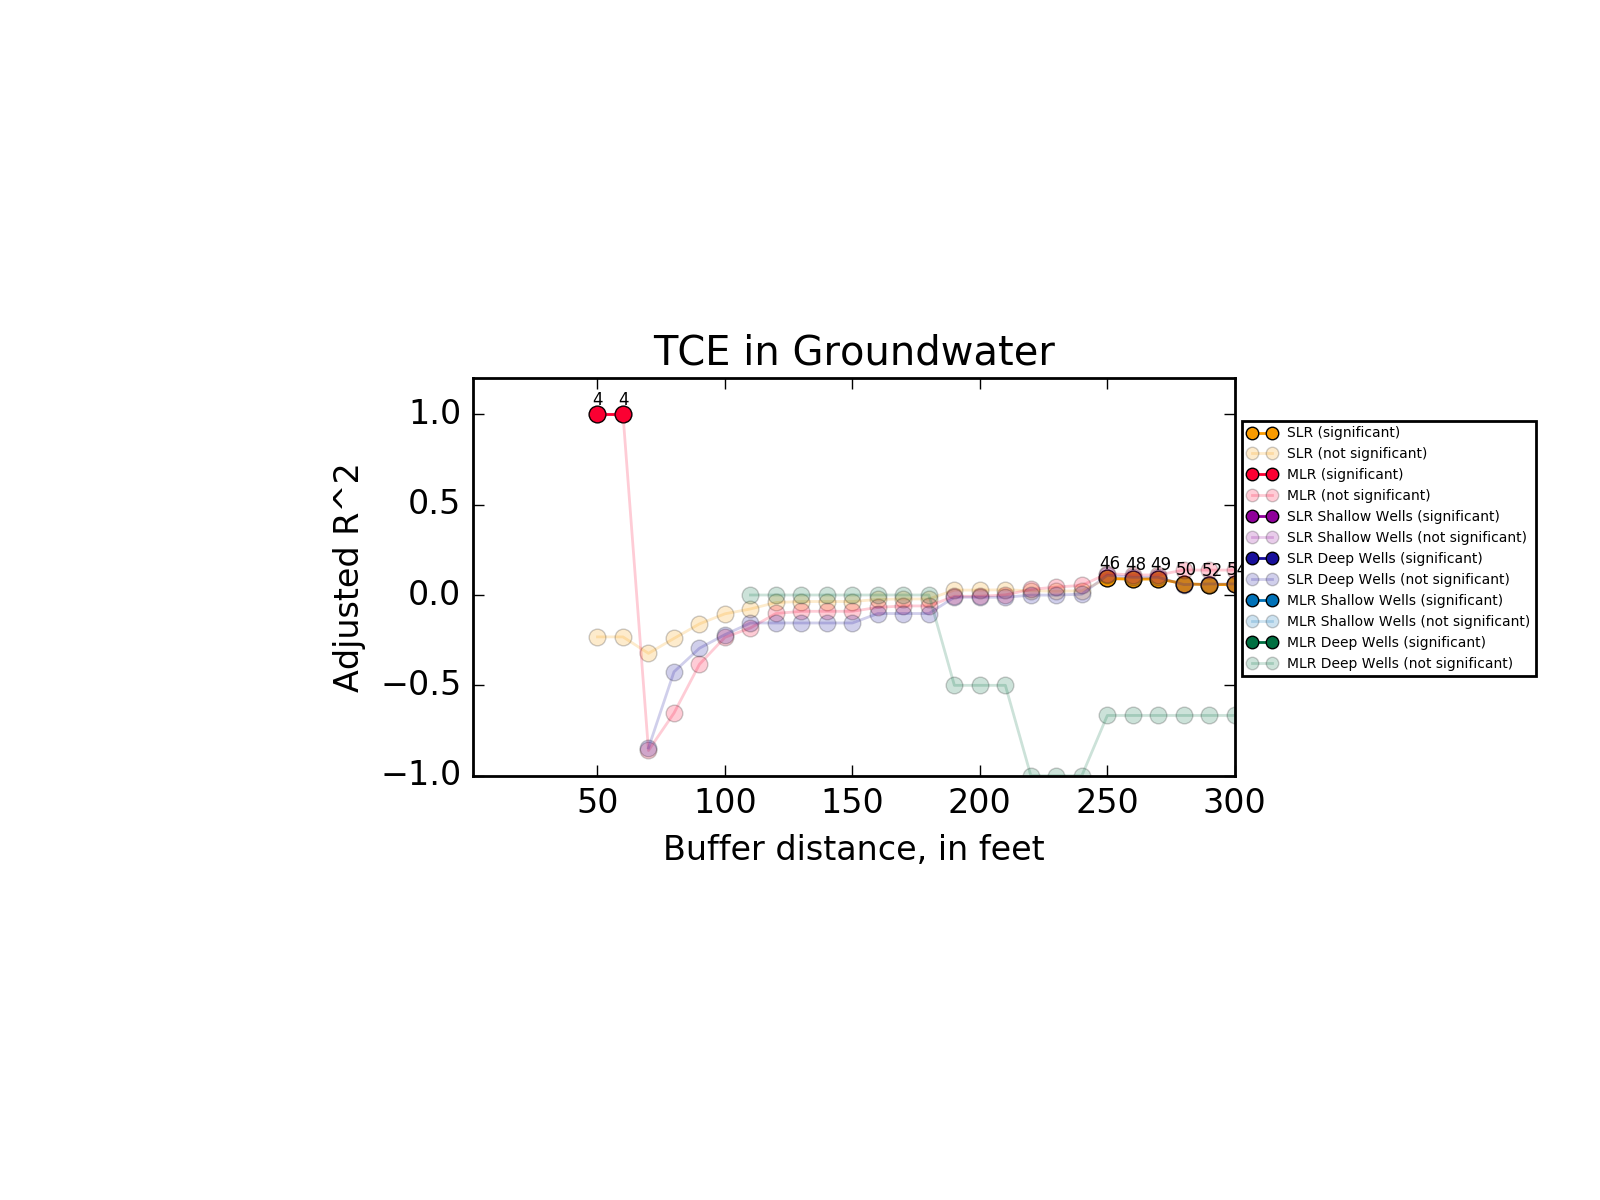

In [53]:
from matplotlib.legend_handler import HandlerLine2D

stats_SLR['TCE_plot']=np.nan
stats_MLR['TCE_plot']=np.nan
stats_Depth_SLR['TCE_plot_s']=np.nan
stats_Depth_SLR['TCE_plot_d']=np.nan
stats_Depth_MLR['TCE_plot_s']=np.nan
stats_Depth_MLR['TCE_plot_d']=np.nan

stats_SLR.loc[(stats_SLR.iloc[:,13]<0.05)&(stats_SLR.iloc[:,14]<0.05),'TCE_plot']=stats_SLR.iloc[:,12]
stats_MLR.loc[(stats_MLR.iloc[:,11]<0.05)&(stats_MLR.iloc[:,12]<0.05)&(stats_MLR.iloc[:,13]<0.05),'TCE_plot']=stats_MLR.iloc[:,10]
stats_Depth_SLR.loc[(stats_Depth_SLR.iloc[:,13]<0.05)&(stats_Depth_SLR.iloc[:,14]<0.05),'TCE_plot_s']=stats_Depth_SLR.iloc[:,12]
stats_Depth_SLR.loc[(stats_Depth_SLR.iloc[:,31]<0.05)&(stats_Depth_SLR.iloc[:,32]<0.05),'TCE_plot_d']=stats_Depth_SLR.iloc[:,30]

stats_Depth_MLR.loc[(stats_Depth_MLR.iloc[:,15]<0.05)&(stats_Depth_MLR.iloc[:,16]<0.05)&(stats_Depth_MLR.iloc[:,17]<0.05),'TCE_plot_s']=stats_Depth_MLR.iloc[:,14]
stats_Depth_MLR.loc[(stats_Depth_MLR.iloc[:,36]<0.05)&(stats_Depth_MLR.iloc[:,37]<0.05)&(stats_Depth_MLR.iloc[:,38]<0.05),'TCE_plot_d']=stats_Depth_MLR.iloc[:,35]

fig, ax = plt.subplots(dpi=200)

slr, = ax.plot(stats_SLR['TCE_plot'],'-o', label='SLR (significant)', c='#F99B00')
slr, = ax.plot(stats_SLR['R2-TCE'],'-o', label='SLR (not significant)', alpha=0.2,c='#F99B00')

mlr, = ax.plot(stats_MLR['TCE_plot'],'-o',label='MLR (significant)',c='#FB0032')
mlr, = ax.plot(stats_MLR['R2-TCE'],'-o',label='MLR (not significant)',alpha=0.2,c='#FB0032')

slr_s, = ax.plot(stats_Depth_SLR['TCE_plot_s'],'-o',label='SLR Shallow Wells (significant)',c='#8F009A')
slr_s, = ax.plot(stats_Depth_SLR.iloc[:,12],'-o',alpha=0.2,label='SLR Shallow Wells (not significant)',c='#8F009A')

slr_d, = ax.plot(stats_Depth_SLR['TCE_plot_d'],'-o',label='SLR Deep Wells (significant)',c='#180F9B')
slr_d, = ax.plot(stats_Depth_SLR.iloc[:,30],'-o',alpha=0.2,label='SLR Deep Wells (not significant)',c='#180F9B')

mlr_s, = ax.plot(stats_Depth_MLR['TCE_plot_s'],'-o',label='MLR Shallow Wells (significant)',c='#0071B7')
mlr_s, = ax.plot(stats_Depth_MLR.iloc[:,14],'-o',alpha=0.2,label='MLR Shallow Wells (not significant)',c='#0071B7')

mlr_d, = ax.plot(stats_Depth_MLR['TCE_plot_d'],'-o',label='MLR Deep Wells (significant)',c='#006F41')
mlr_d, = ax.plot(stats_Depth_MLR.iloc[:,35],'-o',alpha=0.2,label='MLR Deep Wells (not significant)',c='#006F41')


plt.legend(handler_map={mlr: HandlerLine2D(numpoints=2)}, loc=(1.01,0.25),fontsize=5, ncol=1,markerscale=0.75)

for index, r2, n in zip(stats_SLR.index, stats_SLR['TCE_plot'], stats_SLR.iloc[:,15]):                                       # <--
    if r2>0:
        ax.annotate('{}'.format(int(n)),xy=(index-3, r2+.05),fontsize=6)
for index, r2, n in zip(stats_MLR.index, stats_MLR['TCE_plot'], stats_MLR.iloc[:,14]):                                       # <--
    if r2>0:
        ax.annotate('{}'.format(int(n)),xy=(index-2, r2+.05),fontsize=6)
for index, r2, n in zip(stats_Depth_SLR.index, stats_Depth_SLR['TCE_plot_s'], stats_Depth_SLR.iloc[:,15]):                                       # <--
    if r2>0:
        ax.annotate('{}'.format(int(n)),xy=(index-3, r2+.05),fontsize=6)
for index, r2, n in zip(stats_Depth_SLR.index, stats_Depth_SLR['TCE_plot_d'], stats_Depth_SLR.iloc[:,33]):                                       # <--
    if r2>0:
        ax.annotate('{}'.format(int(n)),xy=(index-3, r2+.05),fontsize=6)
for index, r2, n in zip(stats_Depth_MLR.index, stats_Depth_MLR['TCE_plot_s'], stats_Depth_MLR.iloc[:,18]):                                       # <--
    if r2>0:
        ax.annotate('{}'.format(int(n)),xy=(index-3, r2+.05),fontsize=6)
for index, r2, n in zip(stats_Depth_MLR.index, stats_Depth_MLR['TCE_plot_d'], stats_Depth_MLR.iloc[:,39]):                                       # <--
    if r2>0:
        ax.annotate('{}'.format(int(n)),xy=(index-3, r2+.05),fontsize=6)

# for gw, tree, species in zip(trees_gw_TCE_shallow.gw_log_TCE, trees_gw_TCE_shallow.tree_log_TCE, trees_gw_TCE_shallow.Last_Speci):                                       # <--
#     ax.annotate('{}'.format(species),xy=(gw, tree))
plt.xlabel('Buffer distance, in feet')
plt.ylabel('Adjusted R^2')
plt.ylim(-1,1.2)
plt.xlim(1,300)
plt.title('TCE in Groundwater')
plt.tight_layout(pad=10)
plt.savefig("GW_TCE.pdf")

    
plt.show()